<a href="https://colab.research.google.com/github/tomasallemand/Coderhouse---Entrega-final/blob/main/TPF_AllemandTomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABSTRACT

El estudio de la democracia como sistema de gobierno es fundamental para comprender y mejorar el desempeño de nuestras sociedades modernas, al menos en las sociedades que comparten los valores occidentales.

En este sentido intentaremos comprender qué fundamentos hay por detras de las percepciones que cada uno de los ciudadanos tiene sobre la democracia, intentando realizar un modelo que nos permita predecir cuando un ciudadano podría tener una percepción negativa de este sistema de gobierno.

**Motivación**: Es sumamente relevante conocer también la perspectiva y conformidad de los usuarios de este sistema: la ciudadanía. Esto adquiere aún más relevancia a la luz de las experiencias antidemocrácticas vividas en el siglo XX (al menos en Europa y Sudamérica) que dieron lugar a regímenes autoritarios y violentos, con consecuencias trágicas, y conocer qué indicadores pueden ser indicio de tendencias similares.

**Audiencia**: Este trabajo intenta dar cuenta de qué variables influyen en la percepción que tiene una persona de la democracia, por lo cual está orientada a cualquier persona que quiera comprender esta forma de gobierno.

#OBJETIVO
Teniendo en cuenta el contexto mencionado previamente, se intentará descubrir qué variables hay por detrás de la percepción que tienen las personas acerca de la democracia, para así hacer una estimación de las percepciones que distintas personas tienen acerca del sistema, aún sin tener el dato de su percepción de la democracia específicamente.

En términos concretos, se intentará encontrar qué variables explican la variable "Q250: Importance of democracy".

#HIPÓTESIS PRINCIPAL:
La valoración que una persona le asigna a la democracia como sistema de gobierno (variable dependiente) está influenciada por su percepción sobre el ordenamiento social, político y económico de su entorno. Específicamente, factores como los niveles de corrupción percibidos, los resultados económicos obtenidos bajo este sistema de gobierno en su país, y la valoración personal de otras instituciones alternativas, como el ejército, afectan su opinión sobre la democracia (variables independientes).

#CONTEXTO COMERCIAL
Una consultora quiere conocer el porcentaje de población que comparte ideas poco democráticas o autoritarias en una sociedad, independientemente de variaciones contextuales que favorezcan la proliferación temporal de este tipo de ideas.

Si bien las ideas antidemocráticas tienden a proliferar en contextos adversos de recesión económica o desaceleración del crecimiento (como cuestionamiento de la capacidad de este sistema de arrojar resultados), ello se trata de un patrón a nivel macro y puramente coyuntural.

En este sentido, se busca analizar qué variables micro tienden a fundamentar posturas autoritarias en los individuos, que puedan persistir independientemente de las variaciones contextuales y el devenir económico de una sociedad.

#PROBLEMA COMERCIAL

¿De qué depende que una persona valore positivamente la democracia como sistema de gobierno?

¿Cuales son los factores más importantes que explican que una persona esté disconforme con este régimen?

#CONTEXTO ANALÍTICO
El dataset a utilizar se llama "World Value Surveys. Wave 7. v5.0" y tal como su nombre lo indica, trata de una encuesta de más de 200 preguntas sobre la percepción de diferentes temas sociopolíticos y económicos de las personas entrevistadas, tanto en términos objetivos (por ejemplo edad o ingresos) o bien subjetivos (por ejemplo, percepción de inseguridad). Se trata de variables cualitativas que han sido codificadas en el dataset como cuantitativas discretas.

A su vez, cada columna fue codificada como Q (question) y un número que representa el orden de esa pregunta.

Posee 295 columnas y han respondido 1003 personas en total

In [1]:
#Importamos las principales librerías con las que vamos a trabajar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
import plotly.express as px

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/tomasallemand/Coderhouse_DS_entregas/main/WVS_FINAL_LIMPIO_7_v5.0.csv',delimiter=";")

In [3]:
# Hacemos una primera revisión del dataset:

df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q290
0,1,2,4,4,1,4,1,2,1,1,...,-3,-5,1,1,2,3,5,2,1,32001
1,1,2,1,2,2,4,2,1,2,1,...,-3,4,2,1,-2,3,3,1,0,32001
2,1,1,1,2,1,1,1,2,2,2,...,-3,7,2,1,-2,3,5,2,1,32001
3,1,1,1,2,2,1,1,2,2,1,...,3,4,2,2,-2,3,7,2,1,32001
4,1,1,1,3,1,3,1,2,2,1,...,-3,4,2,1,4,3,4,2,1,32001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1,1,3,3,2,2,1,1,2,1,...,7,4,2,2,2,3,5,2,1,32001
999,1,1,3,3,2,2,1,1,1,1,...,0,4,2,1,4,4,5,2,1,32002
1000,1,2,3,2,2,4,1,1,1,1,...,-5,-5,2,2,-2,3,7,2,1,32001
1001,2,1,3,3,1,3,2,1,2,1,...,-5,-5,1,1,2,3,5,2,1,32001


In [4]:
#Eliminamos algunas columnas repetidas:
# Lista de columnas repetidas
columns_to_drop = ['Q34_3','Q33_3','Q35_3',]

# Eliminar las columnas
df = df.drop(columns=columns_to_drop)

# REMOCIÓN DE NULOS

**Sobre los datos**:
Al ser una encuesta, los valores nulos están cargados como valores negativos. Por ende, para remover los nulos, debemos tratar a los valores negativos.

La opción de eliminar todos los negativos del DataFrame nos deja únicamente con 23 filas de las 1003 del dataset original, lo cual nos lleva a descartar esa opción.

Esto nos deja algunas otras opciones posibles:
1. Herramientas de reducción de la dimensionalidad: PCA, feature selection, etc.
2. Imputar con algun mecanismo entre los distintos posibles para los nulos y trabajar con los datos resultantes.
3. Finalmente, podemos hacer un análisis de correlación de cada variable con la variable target, para eliminar las columnas irrelevantes y perder menos filas a la hora de eliminar nulos.

Luego de probar todas estas opciones, la opción ganadora en función de la performance final de los modelos a testear ha sido la de reducir la dimensionalidad, detectando las diez variables más correlacionadas con la variable target, y eliminando el resto de columnas.

In [5]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar la correlación de todas las variables con respecto a 'Q250'
correlacion_q250 = corr_matrix['Q250'].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas con 'Q250'
top_10_correlacion = correlacion_q250.head(11)  # Incluyendo 'Q250' en sí mismo
print(top_10_correlacion)

Q250    1.000000
Q251    0.356080
Q243    0.309428
Q249    0.262976
Q112    0.232325
Q237    0.226643
Q197    0.211022
Q244    0.200042
Q127    0.170030
Q31     0.169400
Q77     0.157424
Name: Q250, dtype: float64


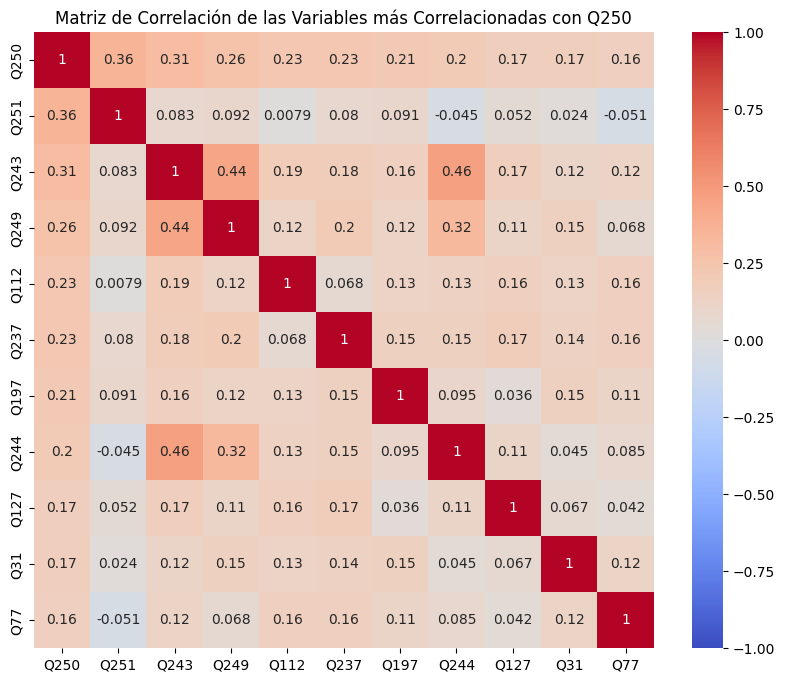

In [6]:
#Vamos a hacer una matriz para ver la distribución de correlación entre las variables del dataset:

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_10_correlacion.index].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de las Variables más Correlacionadas con Q250')
plt.show()

De las 10 variables con mayor nivel de correlación respecto de "Y", las que poseen una correlación lógica esperada a la hora de explicar la importancia que las personas dan a la democracia (para evitar caer en correlaciones espurias) son:

- Q243: Democracy: People choose their leaders in free elections
- Q249: Democracy: Women have the same rights as men
- Q237: Political system: Having the army rule (relación inversa).
- Q197: Government has the right: Monitor all e-mails and any other information exchanged on the Internet
- Q127: Immigration in your country: Helps poor people establish new lives
- Q112: Perceptions of corruption in the country

In [7]:
# Dimensionalidad original del dataset:
df.shape

(1003, 292)

In [8]:
# Lista de las columnas más correlacionadas con Q250
columnas_correlacionadas = ['Q250', 'Q243', 'Q249', 'Q112', 'Q237', 'Q197', 'Q127']

# Dejamos otra variable relevante para revisar en el EDA (Q262 = Edad)

# Crear un nuevo dataframe con sólo estas columnas
df_reducido = df[columnas_correlacionadas]

df_reducido.head()

,Q250,Q243,Q249,Q112,Q237,Q197,Q127
0,10,10,10,10,4,4,1
1,10,10,10,10,4,3,2
2,10,10,10,10,4,4,2
3,10,10,10,10,4,-1,2
4,10,10,10,10,4,4,2


In [9]:
df_reducido.shape

(1003, 7)

In [10]:
# Calculamos la proporción de valores negativos en términos porcentuales por columna
negatives_percentage = df_reducido.apply(lambda x: (x < 0).sum() / len(x) * 100)
print("Porcentaje de valores negativos por columna:")
print(negatives_percentage)

Porcentaje de valores negativos por columna:
Q250    1.395813
Q243    1.395813
Q249    1.994018
Q112    0.598205
Q237    6.181456
Q197    4.386839
Q127    4.087737
dtype: float64


In [11]:
# Reemplazamos valores negativos con NaN
df_reducido = df_reducido.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# Eliminamos filas con valores nulos
df_reducido = df_reducido.dropna()

# Verificamos que no hay valores negativos ni nulos
print(df_reducido.isnull().sum().sum())  # Debe ser 0
print((df_reducido.select_dtypes(include=[np.number]) < 0).sum().sum())  # Debe ser 0

0
0


<ipython-input-11-67883ccbe41d>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_reducido = df_reducido.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)


##Definiendo X e Y



In [12]:
X = df_reducido.drop('Q250', axis=1)
y = df_reducido['Q250']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 346345)

In [13]:
print(df_reducido['Q250'].unique())

[10.  9.  8.  6.  4.  7.  5.  1.  3.  2.]


In [14]:
print(df_reducido['Q250'].dtype)

float64


##Transformador y Pipeline

###Eliminación de nulos y negativos

In [15]:
#Importamos las librerías necesarias:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [16]:
# Transformador para convertir valores menores a 0 a NaN y luego eliminar filas con NaN
class NegativeToNaNDropRows(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Reemplazar valores negativos con NaN
        X = X.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

        # Eliminar filas con valores nulos
        X = X.dropna()

        # Verificar que no hay valores negativos ni nulos
        assert X.isnull().sum().sum() == 0, "Hay valores nulos en el dataset"
        assert (X.select_dtypes(include=[np.number]) < 0).sum().sum() == 0, "Hay valores negativos en el dataset"

        return X

In [17]:
class TargetTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, y, X=None):
        return self

    def transform(self, y):
        # Reemplazar valores negativos con NaN
        y = y.apply(lambda x: np.nan if x < 0 else x)
        # Eliminar valores nulos
        y = y.dropna()
        return y

In [18]:
#Creamos el transformador:
transformer = Pipeline(steps=[
    ('neg_to_nan', NegativeToNaNDropRows())
])

In [19]:
preprocessor = ColumnTransformer(transformers=[
        ('num', transformer, X.columns)
    ]
)

In [20]:
# Obtener los nombres de las columnas originales
column_names = X.columns

In [21]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('neg_to_nan',
                                                  NegativeToNaNDropRows())]),
                                 Index(['Q243', 'Q249', 'Q112', 'Q237', 'Q197', 'Q127'], dtype='object'))])

In [22]:
# Aplicar el preprocesador
X_train_prepro=preprocessor.fit_transform(X_train)

# Crear un DataFrame con los nombres de las columnas originales
X_train=pd.DataFrame(X_train_prepro,columns=column_names)

X_train.shape


<ipython-input-16-4f6fd158b688>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)


(636, 6)

In [23]:
# Aplicar la transformación a la variable objetivo
target_transformer = TargetTransformer()
y_transformed = target_transformer.fit_transform(y)

y_train.shape

(636,)

#**EXPLORATORY DATA ANALYSIS**

In [24]:
#Renombramos las variables del dataset para crear visualizaciones más claras:

df_limpio = df_reducido.rename(columns={'Q250':'Importance_Democracy','Q243':'Trust_leaders','Q249':'Women_Man_EqualRights','Q112':'Corruption_Perception','Q237':'Army_Rule','Q197':'Government_rights','Q127':'Poor_inmigration','Q262':'Age'})

##Descripción de las Variables Independientes (X):

**Las variables independientes finales con las que trabajaremos, de acuerdo con el modelo, son las siguientes:**

In [25]:
print(pd.DataFrame(df_limpio.columns))

                       0
0   Importance_Democracy
1          Trust_leaders
2  Women_Man_EqualRights
3  Corruption_Perception
4              Army_Rule
5      Government_rights
6       Poor_inmigration


- Q243: Democracy: People choose their leaders in free elections
- Q112: Perceptions of corruption in the country
- Q237: Political system: Having the army rule (relación inversa).
- Q197: Government has the right: Monitor all e-mails and any other information exchanged on the Internet
- Q249: Democracy: Women have the same rights as men
- Q127: Immigration in your country: Helps poor people establish new lives

Todas ellas tienen una relación lógica con la percepción que puede tener una persona acerca de la democracia.
- En cuanto a la variable "**Q243** People choose their leaders in free elections", es lógico esperar que quienes crean que efectivamente los líderes de su país son elegidos en elecciones libres, crean en este sistema de gobierno, al menos en mayor medida respecto de quienes puedan considerar que las elecciones no son tan virtuosas.
- La variable "**"Q112"** Perception of corruption in the country" lógicamente incide en cómo una persona pueda percibir a la democracia: quienes perciban que la toma de decisiones que afectaran al conjunto de la sociedad obedecen a reglas diferentes a la voluntad popular podrían ser más propensos a cuestionar este régimen político.
- La variable "**"Q237"** "Political system: Having the army rule", es de especial interés ya que cuestiona acerca de la percepción que tienen las personas de un actor importante en el ordenamiento social: el ejército. Ha sido en la historia latinoamericana del siglo pasado el protagonista del régimen político alternativo a la democracia, y por ende es esperable que quienes tengan una mejor percepción de este régimen, sean más críticos de la democracia. La relación es entonces inversa (la correlación se ve positiva por el hecho de que las respuestas están invertidas: 1 significa muy de acuerdo, y 4 significa totalmente en desacuerdo).
- La variable "**Q197** Government has the right: Monitor all e-mails and any other information exchanged on the Internet" pone en cuestión los límites a los cuales los gobiernos podrían acceder en la vida privada de las personas. Los gobiernos más autoritarios tienden a gobernar mayores ámbitos de las personas que aquellos más liberales (y consistentes con las democracias). Si bien esta variable se limita a la aceptación que las personas tienen de la injerencia del Estado en un elemento puntual de la vida privada (los mails de las personas), puede entenderse a su vez como qué tan de acuerdo están con la injerencia de la política en asuntos privados.
- En cuanto a las variables "**Q249** Democracy: Women have the same rights as men" y "**Q127** Immigration in your country: Helps poor people establish new lives", estas intentan capturar la percepción que tiene una determinadad persona respecto a las minorías, lo cual es completamente relevante a la hora de evaluar qué tan democrática es esta persona, en tanto la democracia, especialmente en una forma de gobierno republicana como lo es en nuestro país, es un sistema que intenta proteger incluso a las "minorías" étnicas, raciales, de género, entre otras.

## **Análisis Univariado**:

**EDAD**:
Una variable que no utilizaremos en el modelo, pero es relevante para comprender las características de la muestra con la cual se está trabajando.

In [26]:
# Histograma de distribución de la edad en la muestra:
px.histogram(df,x='Q262',title='Edad')

Podemos ver que hay cierto sesgo en la encuesta, donde gran parte de los participantes son más jóvenes. Habría que revisar si esto implica algún tipo de sesgo dado que diferentes fuentes fundamentan la existencia de diferencias ideológicas muy marcadas en función de los diferentes grupos etarios.

Para ello, vamos a revisar primero la distribución de "Q250", es decir, nuestra variable target, por sí sola, y luego la distribución de la misma en función de "Q262", es decir edad, para poder así observar la influencia o no del sesgo en cuestión.

**Veamos ahora la distribución de la valoración de la democracia como sistema de gobierno, es decir nuestra variable target (Q250)**:

In [27]:
# Repasando las columnas de nuestro DataFrame:
df_limpio.head()

,Importance_Democracy,Trust_leaders,Women_Man_EqualRights,Corruption_Perception,Army_Rule,Government_rights,Poor_inmigration
0,10.0,10.0,10.0,10.0,4.0,4.0,1.0
1,10.0,10.0,10.0,10.0,4.0,3.0,2.0
2,10.0,10.0,10.0,10.0,4.0,4.0,2.0
4,10.0,10.0,10.0,10.0,4.0,4.0,2.0
5,10.0,10.0,10.0,10.0,3.0,4.0,2.0


In [28]:
#Histograma de distribución de percepción de democracia (Variable dependiente):
px.histogram(df_limpio,x='Importance_Democracy',title='Valoración de la democracia como sistema de gobierno')

**Revisamos el posible sesgo**:
Vamos a cruzar la distribución de la edad contra la valoración de la democracia como régimen político para descubrir una posible influencia de este sesgo en la variable objetivo:

In [29]:
# Revisando que 'Q262' sea numérico
df['Q262'] = pd.to_numeric(df['Q262'], errors='coerce')

# Definir las categorías y los bins
categories = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']
bins = [18, 25, 35, 45, 55, 65, 75, 85]

# Aplicar pd.cut
df['Q262'] = pd.cut(df['Q262'], bins=bins, labels=categories, right=False)

# Convertir a categoría ordenada
df['Q262'] = pd.Categorical(df['Q262'], categories=categories, ordered=True)

In [30]:
# Crear el gráfico de cajas
fig = px.box(df, x='Q262', y='Q250',
             title='Influencia del sesgo etario en el comportamiento de la variable Target: Importancia de la democracia vs Edad',
             labels={'Q262': 'Edad', 'Q250': 'Importancia de la democracia'},
             category_orders={'Q262': categories})

# Personalizar el gráfico según tus necesidades
fig.update_layout(xaxis=dict(tickmode='array', tickvals=categories, ticktext=categories))

# Mostrar el gráfico
fig.show()

A pesar de nuestras suposiciones previas, no se observa un sesgo etario en función de la percepción de la democracia como sistema de gobierno.

##Análisis Bivariado:

**Gobierno militar contra importancia de la democracia**:

In [31]:
# Gobierno militar contra importancia de la democracia:
fig = px.box(df_limpio, x='Army_Rule', y='Importance_Democracy', title='Democracia vs. Gobierno militar',
             category_orders={'Army_Rule': [1, 2, 3, 4],
                              'Importance_Democracy': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             labels={'Army_Rule': 'Gobierno militar', 'Importance_Democracy': 'Democracia'})

# Invertir el eje Y
fig.update_yaxes(categoryorder='array', categoryarray=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Cambiar las etiquetas:
fig.update_yaxes(ticktext=['Not_democratic', '2', '3', '4', '5', '6', '7', '8', '9', 'Democratic'],
                 tickvals=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

fig.update_xaxes(ticktext=['Suport_Army_Rule', '2', '3', 'Dont_Support_Army_Rule'],
                 tickvals=['1', '2', '3', '4'])

# Mostrar el gráfico
fig.show()

Si agrupamos grupos de personas de acuerdon con su grado de aceptación de un posible gobierno militar, en el cual las personas del grupo 1 (army rule) consideran que sería muy buen gobierno, y las personas del grupo 4 (quienes consideran que sería muy malo) y sus valores intermedios, podemos ver que las personas que respondieron que el gobierno militar sería muy buen gobierno o simplemente un buen gobierno, tienen una mayor dispersión acerca de su concepción de la democracia. Mientras que quienes consideran que sería "malo" o "muy malo" tener un gobierno militar, concentran sus percepciones de la democracia como un sistema de gobierno totalmente importante.

**Género y Democracia**:

In [32]:
# Percepción de Género y valoración de la democracia:
fig = px.box(df_limpio, x='Women_Man_EqualRights', y='Importance_Democracy', title='Géneros vs. Importancia de la democracia')

# Cambiar las etiquetas:
fig.update_yaxes(ticktext=['Not_democratic', '2', '3', '4', '5', '6', '7', '8', '9', 'Democratic'],
                 tickvals=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

fig.update_xaxes(ticktext=['Against_Equal_Rights','2', '3', '4', '5', '6', '7', '8', '9','Agree_with_equal_rights'],
                 tickvals=['1','2', '3', '4', '5', '6', '7', '8', '9', '10'])

# Mostrar el gráfico
fig.show()

Quienes comprenden la importancia de reconocer iguales derechos para ambos sexos, apoyan en un sentido mucho más homogéneo un régimen democrático. En contrapartida, quienes están en contra de la igualdad de género, tienen visiones más heterogéneas y dispersas de la democracia.

**Aceptación de injerencia del Estado como regulador de la vida privada de las personas contra percepción de la democracia**:

In [33]:
# Crear el gráfico de cajas con las etiquetas personalizadas
fig = px.box(df_limpio,
             x='Government_rights',
             y='Importance_Democracy',
             title='Aceptación a las regulaciones del Estado de la vida privada y Democracia',
             category_orders={'Government_rights': ['Have the right', '2', '3', 'Not have the right'],
                              'Importance_Democracy': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             labels={'Government_rights': 'Injerencia del Gobierno',
                     'Importance_Democracy': 'Democracia'})

# Invertir el eje Y y cambiar las etiquetas
fig.update_yaxes(ticktext=['Not_democratic', '2', '3', '4', '5', '6', '7', '8', '9', 'Democratic'],
                 tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Cambiar las etiquetas del eje X
fig.update_xaxes(ticktext=['Have the right', '2', '3', 'Not have the right'],
                 tickvals=[1, 2, 3, 4])

# Mostrar el gráfico
fig.show()

Podemos notar una distribución similar de las variables a los casos anteriores. Las personas que consideran que hay aspectos de la vida privada que el Estado no debería regular (Si bien la pregunta se limita al derecho del Estado a leer mails privados, podemos entender que esta pregunta se extiende a la percepción que tienen las personas del derecho del Estado a intervenir en general en la vida privada de las personas, por ejemplo cómo vestirse, cuales noticias leer y cuales no, qué libros leer y cuales no, entre otras) son personas que tienen una percepción de la democracia mucho más positiva y homogenea que quienes consideran que el Estado tiene derecho a regular aspectos privados e íntimos de las personas, que a su vez tienen una visión mucho más heterogénea de la democracia, incluyendo a personas que no están de acuerdo con ese régimen político.

**Confianza en que los líderes son electos de forma libre y genuina contra valoración de la democracia como régimen político**:

In [34]:
# Crear el gráfico de cajas con las etiquetas personalizadas
fig = px.box(df_limpio,
             x='Trust_leaders',
             y='Importance_Democracy',
             title='Elecciones libres y democracia',
             category_orders={'Trust_leaders': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                              'Importance_Democracy': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             labels={'Trust_leaders': 'Elecciones libres',
                     'Importance_Democracy': 'Democracia'})

# Invertir el eje Y y cambiar las etiquetas
fig.update_yaxes(ticktext=['Not_democratic', '2', '3', '4', '5', '6', '7', '8', '9', 'Democratic'],
                 tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Cambiar las etiquetas del eje X
fig.update_xaxes(ticktext=['Dont_trust_free_elections', '2', '3', '4', '5', '6', '7', '8', '9', 'Trust_free_elections'],
                 tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Mostrar el gráfico
fig.show()

En el gráfico podemos observar cómo las personas que creen que los líderes son realmente electos en elecciones libres (dicho de otra manera, las personas que creen que la democracia funciona en tanto mecanismo de selección de dirigentes), son los grupos que creen de manera más consistente y con menor dispersión en la democracia como la mejor forma de ordenamiento social.

Por su parte, las personas qué creen en menor medida en la existencia de elecciones verdaderamente libres que generen resultados genuinos, muestran una percepción más heterogénea de la democracia como régimen político.

**Percepción de Corrupción y Valoración de la Democracia**:

In [35]:
# Crear el gráfico de cajas con las etiquetas personalizadas
fig = px.box(df_limpio,
             x='Corruption_Perception',
             y='Importance_Democracy',
             title='Percepción de Corrupción y Democracia',
             category_orders={'Corruption_Perception': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                              'Importance_Democracy': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             labels={'Corruption_Perception': 'Percepción de Corrupción',
                     'Importance_Democracy': 'Democracia'})

# Invertir el eje Y y cambiar las etiquetas
fig.update_yaxes(ticktext=['Not_democratic', '2', '3', '4', '5', '6', '7', '8', '9', 'Democratic'],
                 tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Cambiar las etiquetas del eje X
fig.update_xaxes(ticktext=['There is not Corruption', '2', '3', '4', '5', '6', '7', '8', '9', 'There is abundant Corruption'],
                 tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Mostrar el gráfico
fig.show()

A pesar de la correlación entre las variables, no se distingue de manera tan clara que haya una tendencia clara sobre la valoración de la democracia en función de la percepción de corrupción en el país.

# MODELADO

Se busca desarrollar un modelo que logre explicar y predecir el comportamiento de la variable "Valoración de la Democracia" en función del comportamiento de las variables independientes seleccionadas para tal caso.

Dado que la variable target es de naturaleza cuantitativa discreta, es decir categórica, intentamos predecir un determinado valor categórico de Y en función de nuestras X, vamos a trabajar con un modelo de clasificación multiclase.

##GridSearchCV:

Optimización de hiperparámetros

In [36]:
from sklearn.model_selection import StratifiedKFold

# Definir StratifiedKFold con 3 pliegues
cv = StratifiedKFold(n_splits=3)

In [37]:
!pip install xgboost catboost
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" an

In [38]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [39]:
# Instanciamos el modelo viejo, que lo vamos a comparar con el ganador del gridsearch:
LogR=LogisticRegression(C=4, solver='liblinear', max_iter=1000)

In [40]:
params_grid = [
    {
        'estimator': [LogisticRegression()],
        'estimator__C': [0.01, 0.1, 1, 4, 10, 100],
        'estimator__solver': ['liblinear', 'saga'],
        'estimator__max_iter': [100, 200, 300, 1000]
    },
    {
        'estimator': [RandomForestClassifier()],
        'estimator__n_estimators': [200, 300, 500],
        'estimator__max_depth': [5, 7, 9]
    },
    {
        'estimator': [XGBClassifier()],
        'estimator__n_estimators': [100, 200, 300],
        'estimator__max_depth': [3, 5, 7],
        'estimator__learning_rate': [0.01, 0.1, 0.2]
    },
    {
        'estimator': [CatBoostClassifier()],
        'estimator__iterations': [100, 200, 300],
        'estimator__depth': [3, 5, 7],
        'estimator__learning_rate': [0.01, 0.1, 0.2]
    }
]



In [41]:
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogR)])

In [42]:
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', LogisticRegression())])

In [43]:
#Instanciamos y fiteamos:

GS = GridSearchCV(pipe2, params_grid, cv=cv)
GS.fit(X_train, y_train)

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



0:	learn: 2.0618514	total: 47.1ms	remaining: 4.66s
1:	learn: 2.0443061	total: 48.2ms	remaining: 2.36s
2:	learn: 2.0273171	total: 48.9ms	remaining: 1.58s
3:	learn: 2.0110584	total: 49.9ms	remaining: 1.2s
4:	learn: 1.9956623	total: 50.7ms	remaining: 962ms
5:	learn: 1.9805448	total: 51.4ms	remaining: 806ms
6:	learn: 1.9654132	total: 52.2ms	remaining: 694ms
7:	learn: 1.9522634	total: 53ms	remaining: 609ms
8:	learn: 1.9398944	total: 53.8ms	remaining: 544ms
9:	learn: 1.9263971	total: 54.5ms	remaining: 490ms
10:	learn: 1.9131174	total: 55ms	remaining: 445ms
11:	learn: 1.9002690	total: 56.1ms	remaining: 411ms
12:	learn: 1.8886903	total: 56.9ms	remaining: 381ms
13:	learn: 1.8772723	total: 57.5ms	remaining: 353ms
14:	learn: 1.8662116	total: 58.1ms	remaining: 329ms
15:	learn: 1.8553678	total: 58.9ms	remaining: 309ms
16:	learn: 1.8447405	total: 59.7ms	remaining: 292ms
17:	learn: 1.8340922	total: 60.6ms	remaining: 276ms
18:	learn: 1.8247840	total: 61.1ms	remaining: 261ms
19:	learn: 1.8147757	total:

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



19:	learn: 1.2819089	total: 16.8ms	remaining: 67ms
20:	learn: 1.2713211	total: 17.4ms	remaining: 65.3ms
21:	learn: 1.2624492	total: 18ms	remaining: 63.7ms
22:	learn: 1.2567820	total: 18.7ms	remaining: 62.6ms
23:	learn: 1.2513392	total: 20ms	remaining: 63.5ms
24:	learn: 1.2436296	total: 20.6ms	remaining: 61.7ms
25:	learn: 1.2382189	total: 21.6ms	remaining: 61.4ms
26:	learn: 1.2332362	total: 22.5ms	remaining: 60.9ms
27:	learn: 1.2251192	total: 23.3ms	remaining: 59.8ms
28:	learn: 1.2208018	total: 24ms	remaining: 58.7ms
29:	learn: 1.2155571	total: 24.7ms	remaining: 57.7ms
30:	learn: 1.2099810	total: 25.5ms	remaining: 56.7ms
31:	learn: 1.2023660	total: 26.3ms	remaining: 55.8ms
32:	learn: 1.1990704	total: 27ms	remaining: 54.8ms
33:	learn: 1.1953228	total: 27.7ms	remaining: 53.9ms
34:	learn: 1.1920324	total: 28.7ms	remaining: 53.2ms
35:	learn: 1.1895160	total: 29.5ms	remaining: 52.4ms
36:	learn: 1.1853015	total: 30.3ms	remaining: 51.5ms
37:	learn: 1.1807018	total: 31ms	remaining: 50.6ms
38:	l

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



82:	learn: 1.0319776	total: 64ms	remaining: 13.1ms
83:	learn: 1.0299013	total: 64.8ms	remaining: 12.3ms
84:	learn: 1.0280212	total: 65.7ms	remaining: 11.6ms
85:	learn: 1.0260514	total: 66.4ms	remaining: 10.8ms
86:	learn: 1.0230331	total: 67.4ms	remaining: 10.1ms
87:	learn: 1.0214188	total: 68.2ms	remaining: 9.3ms
88:	learn: 1.0199749	total: 69.1ms	remaining: 8.54ms
89:	learn: 1.0185939	total: 70.1ms	remaining: 7.78ms
90:	learn: 1.0166988	total: 70.8ms	remaining: 7ms
91:	learn: 1.0142603	total: 71.6ms	remaining: 6.22ms
92:	learn: 1.0137090	total: 72.3ms	remaining: 5.44ms
93:	learn: 1.0115015	total: 73.1ms	remaining: 4.67ms
94:	learn: 1.0100190	total: 73.9ms	remaining: 3.89ms
95:	learn: 1.0088944	total: 74.3ms	remaining: 3.09ms
96:	learn: 1.0077548	total: 74.8ms	remaining: 2.31ms
97:	learn: 1.0058556	total: 75.5ms	remaining: 1.54ms
98:	learn: 1.0046177	total: 76.2ms	remaining: 769us
99:	learn: 1.0026668	total: 77ms	remaining: 0us
0:	learn: 1.9123378	total: 561us	remaining: 55.6ms
1:	lear

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



30:	learn: 1.1179949	total: 48.2ms	remaining: 107ms
31:	learn: 1.1100631	total: 50ms	remaining: 106ms
32:	learn: 1.1056156	total: 51.8ms	remaining: 105ms
33:	learn: 1.1023699	total: 59.4ms	remaining: 115ms
34:	learn: 1.0957438	total: 64.1ms	remaining: 119ms
35:	learn: 1.0909567	total: 68.1ms	remaining: 121ms
36:	learn: 1.0872949	total: 72.1ms	remaining: 123ms
37:	learn: 1.0797010	total: 73.5ms	remaining: 120ms
38:	learn: 1.0769776	total: 81.5ms	remaining: 127ms
39:	learn: 1.0744437	total: 82.1ms	remaining: 123ms
40:	learn: 1.0690548	total: 82.6ms	remaining: 119ms
41:	learn: 1.0655814	total: 86.7ms	remaining: 120ms
42:	learn: 1.0620933	total: 87.4ms	remaining: 116ms
43:	learn: 1.0597520	total: 88ms	remaining: 112ms
44:	learn: 1.0564748	total: 88.6ms	remaining: 108ms
45:	learn: 1.0527049	total: 89.4ms	remaining: 105ms
46:	learn: 1.0462581	total: 91.8ms	remaining: 104ms
47:	learn: 1.0436403	total: 100ms	remaining: 109ms
48:	learn: 1.0401631	total: 101ms	remaining: 105ms
49:	learn: 1.03556

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7552766	total: 9.03ms	remaining: 894ms
1:	learn: 1.6158088	total: 9.65ms	remaining: 473ms
2:	learn: 1.5291208	total: 10.2ms	remaining: 330ms
3:	learn: 1.4632323	total: 10.7ms	remaining: 258ms
4:	learn: 1.4101477	total: 16.9ms	remaining: 320ms
5:	learn: 1.3645093	total: 17.4ms	remaining: 273ms
6:	learn: 1.3334928	total: 17.9ms	remaining: 238ms
7:	learn: 1.3034360	total: 18.5ms	remaining: 213ms
8:	learn: 1.2806870	total: 19ms	remaining: 193ms
9:	learn: 1.2606548	total: 19.6ms	remaining: 176ms
10:	learn: 1.2402075	total: 20.1ms	remaining: 163ms
11:	learn: 1.2214617	total: 20.6ms	remaining: 151ms
12:	learn: 1.2130655	total: 26.7ms	remaining: 179ms
13:	learn: 1.2064860	total: 27.3ms	remaining: 168ms
14:	learn: 1.1917634	total: 27.9ms	remaining: 158ms
15:	learn: 1.1745723	total: 28.4ms	remaining: 149ms
16:	learn: 1.1661571	total: 28.9ms	remaining: 141ms
17:	learn: 1.1594189	total: 29.4ms	remaining: 134ms
18:	learn: 1.1490535	total: 30ms	remaining: 128ms
19:	learn: 1.1406573	total

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



17:	learn: 1.1873169	total: 16.9ms	remaining: 76.9ms
18:	learn: 1.1770162	total: 17.6ms	remaining: 75ms
19:	learn: 1.1708270	total: 18.4ms	remaining: 73.8ms
20:	learn: 1.1595329	total: 19.4ms	remaining: 73.2ms
21:	learn: 1.1536395	total: 20.4ms	remaining: 72.3ms
22:	learn: 1.1515407	total: 21.2ms	remaining: 70.8ms
23:	learn: 1.1464040	total: 21.9ms	remaining: 69.4ms
24:	learn: 1.1381089	total: 22.8ms	remaining: 68.3ms
25:	learn: 1.1328662	total: 23.6ms	remaining: 67.1ms
26:	learn: 1.1268312	total: 24.3ms	remaining: 65.7ms
27:	learn: 1.1218100	total: 25ms	remaining: 64.4ms
28:	learn: 1.1182995	total: 25.8ms	remaining: 63.1ms
29:	learn: 1.1146463	total: 26.7ms	remaining: 62.3ms
30:	learn: 1.1112214	total: 27.5ms	remaining: 61.1ms
31:	learn: 1.1052001	total: 28.2ms	remaining: 60ms
32:	learn: 1.0983161	total: 29ms	remaining: 58.9ms
33:	learn: 1.0910553	total: 29.7ms	remaining: 57.7ms
34:	learn: 1.0875282	total: 30.5ms	remaining: 56.6ms
35:	learn: 1.0828308	total: 31.2ms	remaining: 55.5ms
3

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0613279	total: 3.14ms	remaining: 624ms
1:	learn: 2.0434575	total: 4.48ms	remaining: 444ms
2:	learn: 2.0279454	total: 5.01ms	remaining: 329ms
3:	learn: 2.0121448	total: 5.54ms	remaining: 272ms
4:	learn: 1.9964361	total: 6.04ms	remaining: 236ms
5:	learn: 1.9807843	total: 6.55ms	remaining: 212ms
6:	learn: 1.9668392	total: 7.06ms	remaining: 195ms
7:	learn: 1.9536325	total: 7.59ms	remaining: 182ms
8:	learn: 1.9408692	total: 8.1ms	remaining: 172ms
9:	learn: 1.9282634	total: 8.63ms	remaining: 164ms
10:	learn: 1.9149013	total: 9.15ms	remaining: 157ms
11:	learn: 1.9024481	total: 9.7ms	remaining: 152ms
12:	learn: 1.8910353	total: 10.2ms	remaining: 147ms
13:	learn: 1.8802770	total: 10.7ms	remaining: 143ms
14:	learn: 1.8688099	total: 11.2ms	remaining: 139ms
15:	learn: 1.8574237	total: 11.7ms	remaining: 135ms
16:	learn: 1.8465656	total: 12.3ms	remaining: 132ms
17:	learn: 1.8357538	total: 12.8ms	remaining: 129ms
18:	learn: 1.8260170	total: 13.3ms	remaining: 126ms
19:	learn: 1.8156813	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



37:	learn: 1.6748606	total: 32.8ms	remaining: 140ms
38:	learn: 1.6685396	total: 33.8ms	remaining: 139ms
39:	learn: 1.6620607	total: 34.4ms	remaining: 138ms
40:	learn: 1.6558879	total: 35ms	remaining: 136ms
41:	learn: 1.6500370	total: 35.6ms	remaining: 134ms
42:	learn: 1.6444759	total: 36.2ms	remaining: 132ms
43:	learn: 1.6389168	total: 36.7ms	remaining: 130ms
44:	learn: 1.6330083	total: 37.3ms	remaining: 129ms
45:	learn: 1.6277190	total: 37.9ms	remaining: 127ms
46:	learn: 1.6225753	total: 40.8ms	remaining: 133ms
47:	learn: 1.6173149	total: 41.6ms	remaining: 132ms
48:	learn: 1.6120194	total: 42.4ms	remaining: 131ms
49:	learn: 1.6064892	total: 43.1ms	remaining: 129ms
50:	learn: 1.6010012	total: 44ms	remaining: 128ms
51:	learn: 1.5961187	total: 44.4ms	remaining: 127ms
52:	learn: 1.5908666	total: 44.9ms	remaining: 125ms
53:	learn: 1.5860890	total: 45.7ms	remaining: 124ms
54:	learn: 1.5813292	total: 46.4ms	remaining: 122ms
55:	learn: 1.5765580	total: 47.2ms	remaining: 121ms
56:	learn: 1.571

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



15:	learn: 1.3218655	total: 12.9ms	remaining: 149ms
16:	learn: 1.3098571	total: 14.6ms	remaining: 157ms
17:	learn: 1.3001652	total: 15.2ms	remaining: 154ms
18:	learn: 1.2911173	total: 15.9ms	remaining: 152ms
19:	learn: 1.2819089	total: 16.6ms	remaining: 149ms
20:	learn: 1.2713211	total: 17.3ms	remaining: 147ms
21:	learn: 1.2624492	total: 19.5ms	remaining: 158ms
22:	learn: 1.2567820	total: 20.2ms	remaining: 156ms
23:	learn: 1.2513392	total: 21ms	remaining: 154ms
24:	learn: 1.2436296	total: 21.7ms	remaining: 152ms
25:	learn: 1.2382189	total: 22.4ms	remaining: 150ms
26:	learn: 1.2332362	total: 23.2ms	remaining: 149ms
27:	learn: 1.2251192	total: 24ms	remaining: 147ms
28:	learn: 1.2208018	total: 24.7ms	remaining: 146ms
29:	learn: 1.2155571	total: 25.4ms	remaining: 144ms
30:	learn: 1.2099810	total: 26.2ms	remaining: 143ms
31:	learn: 1.2023660	total: 27ms	remaining: 142ms
32:	learn: 1.1990704	total: 28.5ms	remaining: 144ms
33:	learn: 1.1953228	total: 29.1ms	remaining: 142ms
34:	learn: 1.19203

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



2:	learn: 1.7086904	total: 1.82ms	remaining: 120ms
3:	learn: 1.6431958	total: 2.4ms	remaining: 118ms
4:	learn: 1.5871420	total: 2.94ms	remaining: 115ms
5:	learn: 1.5383411	total: 3.46ms	remaining: 112ms
6:	learn: 1.5012656	total: 3.97ms	remaining: 109ms
7:	learn: 1.4668678	total: 4.49ms	remaining: 108ms
8:	learn: 1.4373483	total: 5.01ms	remaining: 106ms
9:	learn: 1.4124825	total: 5.54ms	remaining: 105ms
10:	learn: 1.3881273	total: 6.04ms	remaining: 104ms
11:	learn: 1.3656300	total: 6.56ms	remaining: 103ms
12:	learn: 1.3501583	total: 7.07ms	remaining: 102ms
13:	learn: 1.3373558	total: 7.58ms	remaining: 101ms
14:	learn: 1.3207069	total: 8.1ms	remaining: 100ms
15:	learn: 1.3027018	total: 8.6ms	remaining: 98.9ms
16:	learn: 1.2891150	total: 9.1ms	remaining: 97.9ms
17:	learn: 1.2786040	total: 9.59ms	remaining: 97ms
18:	learn: 1.2669559	total: 10.1ms	remaining: 96.4ms
19:	learn: 1.2570519	total: 10.6ms	remaining: 95.8ms
20:	learn: 1.2440332	total: 11.2ms	remaining: 95.2ms
21:	learn: 1.2373438

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



121:	learn: 0.9732435	total: 73.1ms	remaining: 46.7ms
122:	learn: 0.9718137	total: 73.6ms	remaining: 46.1ms
123:	learn: 0.9699028	total: 74.3ms	remaining: 45.5ms
124:	learn: 0.9686228	total: 75.2ms	remaining: 45.1ms
125:	learn: 0.9670407	total: 75.9ms	remaining: 44.6ms
126:	learn: 0.9660768	total: 76.7ms	remaining: 44.1ms
127:	learn: 0.9646982	total: 77.3ms	remaining: 43.5ms
128:	learn: 0.9622418	total: 77.9ms	remaining: 42.9ms
129:	learn: 0.9610124	total: 78.4ms	remaining: 42.2ms
130:	learn: 0.9596259	total: 78.9ms	remaining: 41.6ms
131:	learn: 0.9576707	total: 79.4ms	remaining: 40.9ms
132:	learn: 0.9567448	total: 84.9ms	remaining: 42.8ms
133:	learn: 0.9550258	total: 85.6ms	remaining: 42.1ms
134:	learn: 0.9530154	total: 86.2ms	remaining: 41.5ms
135:	learn: 0.9516254	total: 86.8ms	remaining: 40.9ms
136:	learn: 0.9498046	total: 87.5ms	remaining: 40.2ms
137:	learn: 0.9478003	total: 88.1ms	remaining: 39.6ms
138:	learn: 0.9458947	total: 88.7ms	remaining: 38.9ms
139:	learn: 0.9442567	total:

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7640934	total: 646us	remaining: 129ms
1:	learn: 1.6191852	total: 1.3ms	remaining: 128ms
2:	learn: 1.5261993	total: 1.85ms	remaining: 122ms
3:	learn: 1.4613349	total: 2.49ms	remaining: 122ms
4:	learn: 1.4079615	total: 5.12ms	remaining: 200ms
5:	learn: 1.3679227	total: 5.64ms	remaining: 182ms
6:	learn: 1.3378003	total: 6.18ms	remaining: 171ms
7:	learn: 1.3122029	total: 6.72ms	remaining: 161ms
8:	learn: 1.2907080	total: 7.23ms	remaining: 153ms
9:	learn: 1.2679892	total: 9.99ms	remaining: 190ms
10:	learn: 1.2559483	total: 10.6ms	remaining: 182ms
11:	learn: 1.2457072	total: 11.1ms	remaining: 175ms
12:	learn: 1.2350971	total: 11.7ms	remaining: 168ms
13:	learn: 1.2246039	total: 12.2ms	remaining: 162ms
14:	learn: 1.2109754	total: 12.8ms	remaining: 157ms
15:	learn: 1.2035714	total: 13.3ms	remaining: 152ms
16:	learn: 1.1982282	total: 13.8ms	remaining: 148ms
17:	learn: 1.1918223	total: 15.3ms	remaining: 154ms
18:	learn: 1.1852736	total: 15.8ms	remaining: 150ms
19:	learn: 1.1779479	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7552766	total: 682us	remaining: 136ms
1:	learn: 1.6158088	total: 2.68ms	remaining: 266ms
2:	learn: 1.5291208	total: 3.31ms	remaining: 217ms
3:	learn: 1.4632323	total: 5.98ms	remaining: 293ms
4:	learn: 1.4101477	total: 7.28ms	remaining: 284ms
5:	learn: 1.3645093	total: 8.52ms	remaining: 275ms
6:	learn: 1.3334928	total: 9.75ms	remaining: 269ms
7:	learn: 1.3034360	total: 11ms	remaining: 264ms
8:	learn: 1.2806870	total: 12.3ms	remaining: 261ms
9:	learn: 1.2606548	total: 13.6ms	remaining: 258ms
10:	learn: 1.2402075	total: 16.9ms	remaining: 291ms
11:	learn: 1.2214617	total: 20.2ms	remaining: 316ms
12:	learn: 1.2130655	total: 21.1ms	remaining: 303ms
13:	learn: 1.2064860	total: 22.3ms	remaining: 296ms
14:	learn: 1.1917634	total: 23.4ms	remaining: 288ms
15:	learn: 1.1745723	total: 24.6ms	remaining: 283ms
16:	learn: 1.1661571	total: 25.8ms	remaining: 278ms
17:	learn: 1.1594189	total: 26.8ms	remaining: 271ms
18:	learn: 1.1490535	total: 27.9ms	remaining: 266ms
19:	learn: 1.1406573	tota

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



112:	learn: 0.8498525	total: 98.2ms	remaining: 75.6ms
113:	learn: 0.8479969	total: 98.8ms	remaining: 74.5ms
114:	learn: 0.8458893	total: 101ms	remaining: 74.9ms
115:	learn: 0.8444825	total: 102ms	remaining: 73.8ms
116:	learn: 0.8428491	total: 103ms	remaining: 72.7ms
117:	learn: 0.8407526	total: 103ms	remaining: 71.6ms
118:	learn: 0.8382652	total: 104ms	remaining: 70.5ms
119:	learn: 0.8364895	total: 104ms	remaining: 69.4ms
120:	learn: 0.8330922	total: 105ms	remaining: 68.3ms
121:	learn: 0.8312173	total: 105ms	remaining: 67.2ms
122:	learn: 0.8285457	total: 106ms	remaining: 66.2ms
123:	learn: 0.8270021	total: 106ms	remaining: 65.1ms
124:	learn: 0.8261241	total: 107ms	remaining: 64ms
125:	learn: 0.8233437	total: 107ms	remaining: 63ms
126:	learn: 0.8216693	total: 108ms	remaining: 61.9ms
127:	learn: 0.8197396	total: 108ms	remaining: 60.9ms
128:	learn: 0.8177894	total: 109ms	remaining: 59.8ms
129:	learn: 0.8153387	total: 109ms	remaining: 58.8ms
130:	learn: 0.8133214	total: 110ms	remaining: 57

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0618514	total: 604us	remaining: 181ms
1:	learn: 2.0443061	total: 1.96ms	remaining: 292ms
2:	learn: 2.0273171	total: 2.76ms	remaining: 273ms
3:	learn: 2.0110584	total: 3.56ms	remaining: 264ms
4:	learn: 1.9956623	total: 9.57ms	remaining: 565ms
5:	learn: 1.9805448	total: 10.6ms	remaining: 519ms
6:	learn: 1.9654132	total: 11.8ms	remaining: 493ms
7:	learn: 1.9522634	total: 13ms	remaining: 475ms
8:	learn: 1.9398944	total: 20.4ms	remaining: 661ms
9:	learn: 1.9263971	total: 31.2ms	remaining: 905ms
10:	learn: 1.9131174	total: 32.6ms	remaining: 857ms
11:	learn: 1.9002690	total: 33.2ms	remaining: 797ms
12:	learn: 1.8886903	total: 33.7ms	remaining: 745ms
13:	learn: 1.8772723	total: 34.3ms	remaining: 701ms
14:	learn: 1.8662116	total: 34.8ms	remaining: 662ms
15:	learn: 1.8553678	total: 35.4ms	remaining: 629ms
16:	learn: 1.8447405	total: 36ms	remaining: 600ms
17:	learn: 1.8340922	total: 36.5ms	remaining: 572ms
18:	learn: 1.8247840	total: 37ms	remaining: 548ms
19:	learn: 1.8147757	total: 3

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



1:	learn: 2.0434575	total: 2.11ms	remaining: 315ms
2:	learn: 2.0279454	total: 3.08ms	remaining: 305ms
3:	learn: 2.0121448	total: 3.68ms	remaining: 273ms
4:	learn: 1.9964361	total: 4.25ms	remaining: 251ms
5:	learn: 1.9807843	total: 4.78ms	remaining: 234ms
6:	learn: 1.9668392	total: 5.36ms	remaining: 224ms
7:	learn: 1.9536325	total: 5.97ms	remaining: 218ms
8:	learn: 1.9408692	total: 6.5ms	remaining: 210ms
9:	learn: 1.9282634	total: 7.07ms	remaining: 205ms
10:	learn: 1.9149013	total: 7.62ms	remaining: 200ms
11:	learn: 1.9024481	total: 8.18ms	remaining: 196ms
12:	learn: 1.8910353	total: 8.76ms	remaining: 193ms
13:	learn: 1.8802770	total: 9.31ms	remaining: 190ms
14:	learn: 1.8688099	total: 12.8ms	remaining: 243ms
15:	learn: 1.8574237	total: 13.4ms	remaining: 238ms
16:	learn: 1.8465656	total: 13.9ms	remaining: 232ms
17:	learn: 1.8357538	total: 16.4ms	remaining: 257ms
18:	learn: 1.8260170	total: 17.2ms	remaining: 254ms
19:	learn: 1.8156813	total: 18ms	remaining: 251ms
20:	learn: 1.8059434	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



8:	learn: 1.9429941	total: 17.9ms	remaining: 579ms
9:	learn: 1.9300615	total: 18.5ms	remaining: 537ms
10:	learn: 1.9169386	total: 19.1ms	remaining: 502ms
11:	learn: 1.9052698	total: 19.8ms	remaining: 475ms
12:	learn: 1.8938534	total: 21.4ms	remaining: 471ms
13:	learn: 1.8819203	total: 26.5ms	remaining: 541ms
14:	learn: 1.8703019	total: 27.1ms	remaining: 515ms
15:	learn: 1.8586486	total: 28.9ms	remaining: 513ms
16:	learn: 1.8481396	total: 33ms	remaining: 549ms
17:	learn: 1.8373601	total: 34.6ms	remaining: 542ms
18:	learn: 1.8277065	total: 40.5ms	remaining: 598ms
19:	learn: 1.8173772	total: 41.1ms	remaining: 576ms
20:	learn: 1.8073678	total: 41.8ms	remaining: 556ms
21:	learn: 1.7983084	total: 46ms	remaining: 581ms
22:	learn: 1.7891667	total: 46.6ms	remaining: 561ms
23:	learn: 1.7801817	total: 47.2ms	remaining: 543ms
24:	learn: 1.7715435	total: 49.1ms	remaining: 540ms
25:	learn: 1.7624981	total: 49.7ms	remaining: 524ms
26:	learn: 1.7542366	total: 50.3ms	remaining: 509ms
27:	learn: 1.74626

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



39:	learn: 1.1746304	total: 66.6ms	remaining: 433ms
40:	learn: 1.1695460	total: 67.2ms	remaining: 425ms
41:	learn: 1.1675851	total: 67.9ms	remaining: 417ms
42:	learn: 1.1631963	total: 68.5ms	remaining: 409ms
43:	learn: 1.1613871	total: 69.1ms	remaining: 402ms
44:	learn: 1.1572925	total: 69.6ms	remaining: 395ms
45:	learn: 1.1527728	total: 70.2ms	remaining: 388ms
46:	learn: 1.1490500	total: 70.8ms	remaining: 381ms
47:	learn: 1.1460232	total: 71.4ms	remaining: 375ms
48:	learn: 1.1425562	total: 72.1ms	remaining: 369ms
49:	learn: 1.1390509	total: 72.7ms	remaining: 363ms
50:	learn: 1.1365209	total: 73.2ms	remaining: 357ms
51:	learn: 1.1348576	total: 73.8ms	remaining: 352ms
52:	learn: 1.1320824	total: 74.3ms	remaining: 346ms
53:	learn: 1.1295926	total: 74.8ms	remaining: 341ms
54:	learn: 1.1270679	total: 75.3ms	remaining: 336ms
55:	learn: 1.1228745	total: 75.8ms	remaining: 330ms
56:	learn: 1.1211679	total: 76.4ms	remaining: 326ms
57:	learn: 1.1189231	total: 77ms	remaining: 321ms
58:	learn: 1.1

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



24:	learn: 1.2169117	total: 34.6ms	remaining: 381ms
25:	learn: 1.2090862	total: 35.8ms	remaining: 378ms
26:	learn: 1.2040545	total: 39ms	remaining: 394ms
27:	learn: 1.2000590	total: 40.3ms	remaining: 392ms
28:	learn: 1.1938358	total: 42.4ms	remaining: 396ms
29:	learn: 1.1858461	total: 43.7ms	remaining: 394ms
30:	learn: 1.1829417	total: 48ms	remaining: 416ms
31:	learn: 1.1781940	total: 49.3ms	remaining: 413ms
32:	learn: 1.1746149	total: 50.6ms	remaining: 409ms
33:	learn: 1.1704658	total: 51.8ms	remaining: 405ms
34:	learn: 1.1647460	total: 53.1ms	remaining: 402ms
35:	learn: 1.1599260	total: 54.3ms	remaining: 398ms
36:	learn: 1.1557672	total: 55.4ms	remaining: 394ms
37:	learn: 1.1521269	total: 60.3ms	remaining: 416ms
38:	learn: 1.1494914	total: 61.5ms	remaining: 412ms
39:	learn: 1.1454727	total: 62.7ms	remaining: 408ms
40:	learn: 1.1420992	total: 65ms	remaining: 411ms
41:	learn: 1.1375139	total: 66.1ms	remaining: 406ms
42:	learn: 1.1337550	total: 67.3ms	remaining: 402ms
43:	learn: 1.13039

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.9123378	total: 6.74ms	remaining: 2.02s
1:	learn: 1.7980085	total: 13.2ms	remaining: 1.96s
2:	learn: 1.7197058	total: 17.7ms	remaining: 1.75s
3:	learn: 1.6537736	total: 19.5ms	remaining: 1.44s
4:	learn: 1.6007036	total: 23.5ms	remaining: 1.39s
5:	learn: 1.5502924	total: 24.1ms	remaining: 1.18s
6:	learn: 1.5105356	total: 30.4ms	remaining: 1.27s
7:	learn: 1.4755908	total: 33.6ms	remaining: 1.23s
8:	learn: 1.4460038	total: 37.1ms	remaining: 1.2s
9:	learn: 1.4199256	total: 40.6ms	remaining: 1.18s
10:	learn: 1.3964142	total: 44.1ms	remaining: 1.16s
11:	learn: 1.3773621	total: 52.9ms	remaining: 1.27s
12:	learn: 1.3612702	total: 54.6ms	remaining: 1.21s
13:	learn: 1.3460385	total: 55.3ms	remaining: 1.13s
14:	learn: 1.3313219	total: 57.7ms	remaining: 1.09s
15:	learn: 1.3157641	total: 63.3ms	remaining: 1.12s
16:	learn: 1.3053432	total: 65.3ms	remaining: 1.09s
17:	learn: 1.2942221	total: 67.4ms	remaining: 1.06s
18:	learn: 1.2823386	total: 68.4ms	remaining: 1.01s
19:	learn: 1.2735256	to

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



32:	learn: 1.1056156	total: 43.5ms	remaining: 352ms
33:	learn: 1.1023699	total: 44.1ms	remaining: 345ms
34:	learn: 1.0957438	total: 44.7ms	remaining: 338ms
35:	learn: 1.0909567	total: 45.3ms	remaining: 332ms
36:	learn: 1.0872949	total: 45.8ms	remaining: 325ms
37:	learn: 1.0797010	total: 46.3ms	remaining: 319ms
38:	learn: 1.0769776	total: 46.9ms	remaining: 314ms
39:	learn: 1.0744437	total: 47.4ms	remaining: 308ms
40:	learn: 1.0690548	total: 48ms	remaining: 303ms
41:	learn: 1.0655814	total: 55.6ms	remaining: 342ms
42:	learn: 1.0620933	total: 56.2ms	remaining: 336ms
43:	learn: 1.0597520	total: 56.8ms	remaining: 330ms
44:	learn: 1.0564748	total: 60.3ms	remaining: 342ms
45:	learn: 1.0527049	total: 60.9ms	remaining: 336ms
46:	learn: 1.0462581	total: 61.5ms	remaining: 331ms
47:	learn: 1.0436403	total: 62ms	remaining: 326ms
48:	learn: 1.0401631	total: 62.7ms	remaining: 321ms
49:	learn: 1.0355643	total: 63.2ms	remaining: 316ms
50:	learn: 1.0328311	total: 63.7ms	remaining: 311ms
51:	learn: 1.029

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



6:	learn: 1.3334928	total: 11.7ms	remaining: 491ms
7:	learn: 1.3034360	total: 14.5ms	remaining: 529ms
8:	learn: 1.2806870	total: 17ms	remaining: 548ms
9:	learn: 1.2606548	total: 19.2ms	remaining: 558ms
10:	learn: 1.2402075	total: 20.5ms	remaining: 538ms
11:	learn: 1.2214617	total: 21.9ms	remaining: 526ms
12:	learn: 1.2130655	total: 23.3ms	remaining: 515ms
13:	learn: 1.2064860	total: 24.5ms	remaining: 501ms
14:	learn: 1.1917634	total: 25.8ms	remaining: 489ms
15:	learn: 1.1745723	total: 26.9ms	remaining: 478ms
16:	learn: 1.1661571	total: 28ms	remaining: 466ms
17:	learn: 1.1594189	total: 29.1ms	remaining: 457ms
18:	learn: 1.1490535	total: 30.3ms	remaining: 448ms
19:	learn: 1.1406573	total: 31.6ms	remaining: 442ms
20:	learn: 1.1288083	total: 32.9ms	remaining: 437ms
21:	learn: 1.1232187	total: 34.1ms	remaining: 432ms
22:	learn: 1.1212560	total: 35.6ms	remaining: 429ms
23:	learn: 1.1187269	total: 37.2ms	remaining: 428ms
24:	learn: 1.1098961	total: 38.5ms	remaining: 423ms
25:	learn: 1.1024046

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7647466	total: 603us	remaining: 181ms
1:	learn: 1.6224656	total: 1.16ms	remaining: 172ms
2:	learn: 1.5393777	total: 1.66ms	remaining: 165ms
3:	learn: 1.4744870	total: 2.2ms	remaining: 163ms
4:	learn: 1.4274212	total: 2.72ms	remaining: 161ms
5:	learn: 1.3866592	total: 3.24ms	remaining: 159ms
6:	learn: 1.3498456	total: 3.8ms	remaining: 159ms
7:	learn: 1.3197029	total: 4.33ms	remaining: 158ms
8:	learn: 1.2984532	total: 4.83ms	remaining: 156ms
9:	learn: 1.2795316	total: 5.33ms	remaining: 155ms
10:	learn: 1.2615009	total: 5.83ms	remaining: 153ms
11:	learn: 1.2481301	total: 6.33ms	remaining: 152ms
12:	learn: 1.2371086	total: 6.84ms	remaining: 151ms
13:	learn: 1.2269840	total: 7.36ms	remaining: 150ms
14:	learn: 1.2172772	total: 7.88ms	remaining: 150ms
15:	learn: 1.2029124	total: 8.4ms	remaining: 149ms
16:	learn: 1.1956538	total: 12ms	remaining: 200ms
17:	learn: 1.1873169	total: 12.5ms	remaining: 196ms
18:	learn: 1.1770162	total: 13.3ms	remaining: 197ms
19:	learn: 1.1708270	total: 

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



3:	learn: 2.0153679	total: 11.2ms	remaining: 269ms
4:	learn: 2.0024212	total: 26ms	remaining: 494ms
5:	learn: 1.9882017	total: 31.7ms	remaining: 496ms
6:	learn: 1.9723894	total: 39ms	remaining: 518ms
7:	learn: 1.9589462	total: 40.3ms	remaining: 464ms
8:	learn: 1.9455425	total: 41.5ms	remaining: 420ms
9:	learn: 1.9341587	total: 43.4ms	remaining: 390ms
10:	learn: 1.9210502	total: 45.7ms	remaining: 370ms
11:	learn: 1.9097117	total: 52.6ms	remaining: 386ms
12:	learn: 1.8990335	total: 54ms	remaining: 361ms
13:	learn: 1.8878744	total: 55.2ms	remaining: 339ms
14:	learn: 1.8763592	total: 57.3ms	remaining: 325ms
15:	learn: 1.8654733	total: 59.5ms	remaining: 313ms
16:	learn: 1.8549731	total: 66.8ms	remaining: 326ms
17:	learn: 1.8445578	total: 68.1ms	remaining: 310ms
18:	learn: 1.8348506	total: 69.4ms	remaining: 296ms
19:	learn: 1.8251938	total: 71.1ms	remaining: 284ms
20:	learn: 1.8160682	total: 73.1ms	remaining: 275ms
21:	learn: 1.8076068	total: 79.5ms	remaining: 282ms
22:	learn: 1.7976335	tota

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



37:	learn: 1.6796264	total: 55.2ms	remaining: 90.1ms
38:	learn: 1.6730185	total: 60.7ms	remaining: 94.9ms
39:	learn: 1.6666013	total: 67.6ms	remaining: 101ms
40:	learn: 1.6602694	total: 68.5ms	remaining: 98.5ms
41:	learn: 1.6545793	total: 69.2ms	remaining: 95.6ms
42:	learn: 1.6482331	total: 75.2ms	remaining: 99.7ms
43:	learn: 1.6427756	total: 76ms	remaining: 96.7ms
44:	learn: 1.6372248	total: 76.7ms	remaining: 93.7ms
45:	learn: 1.6310658	total: 77.4ms	remaining: 90.8ms
46:	learn: 1.6255939	total: 82.3ms	remaining: 92.8ms
47:	learn: 1.6200107	total: 83.1ms	remaining: 90ms
48:	learn: 1.6145360	total: 83.8ms	remaining: 87.2ms
49:	learn: 1.6092017	total: 84.5ms	remaining: 84.5ms
50:	learn: 1.6035695	total: 85ms	remaining: 81.7ms
51:	learn: 1.5978734	total: 87.3ms	remaining: 80.5ms
52:	learn: 1.5931446	total: 88ms	remaining: 78ms
53:	learn: 1.5876742	total: 88.8ms	remaining: 75.7ms
54:	learn: 1.5827548	total: 89.3ms	remaining: 73.1ms
55:	learn: 1.5776358	total: 90ms	remaining: 70.7ms
56:	le

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



10:	learn: 1.9246892	total: 11ms	remaining: 88.7ms
11:	learn: 1.9122110	total: 11.8ms	remaining: 86.3ms
12:	learn: 1.9006361	total: 12.3ms	remaining: 82ms
13:	learn: 1.8898051	total: 14.7ms	remaining: 90.5ms
14:	learn: 1.8786091	total: 16.6ms	remaining: 94.1ms
15:	learn: 1.8677916	total: 21.9ms	remaining: 115ms
16:	learn: 1.8582870	total: 23.3ms	remaining: 114ms
17:	learn: 1.8483166	total: 24.2ms	remaining: 110ms
18:	learn: 1.8385885	total: 25.4ms	remaining: 108ms
19:	learn: 1.8292780	total: 26.3ms	remaining: 105ms
20:	learn: 1.8187153	total: 27ms	remaining: 102ms
21:	learn: 1.8096397	total: 27.9ms	remaining: 99ms
22:	learn: 1.8006719	total: 28.9ms	remaining: 96.6ms
23:	learn: 1.7921870	total: 29.8ms	remaining: 94.4ms
24:	learn: 1.7838214	total: 30.8ms	remaining: 92.3ms
25:	learn: 1.7751367	total: 31.7ms	remaining: 90.2ms
26:	learn: 1.7669811	total: 32.6ms	remaining: 88.2ms
27:	learn: 1.7588970	total: 33.6ms	remaining: 86.3ms
28:	learn: 1.7510544	total: 34.5ms	remaining: 84.5ms
29:	lea

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



87:	learn: 0.8733319	total: 92.9ms	remaining: 12.7ms
88:	learn: 0.8708630	total: 94ms	remaining: 11.6ms
89:	learn: 0.8675452	total: 95.8ms	remaining: 10.6ms
90:	learn: 0.8654935	total: 97ms	remaining: 9.6ms
91:	learn: 0.8621726	total: 98.6ms	remaining: 8.57ms
92:	learn: 0.8590717	total: 99.8ms	remaining: 7.51ms
93:	learn: 0.8567158	total: 101ms	remaining: 6.42ms
94:	learn: 0.8538445	total: 102ms	remaining: 5.37ms
95:	learn: 0.8492924	total: 103ms	remaining: 4.29ms
96:	learn: 0.8453172	total: 104ms	remaining: 3.21ms
97:	learn: 0.8418063	total: 105ms	remaining: 2.14ms
98:	learn: 0.8387817	total: 106ms	remaining: 1.07ms
99:	learn: 0.8356364	total: 106ms	remaining: 0us
0:	learn: 1.9123378	total: 550us	remaining: 54.5ms
1:	learn: 1.8011210	total: 1.64ms	remaining: 80.5ms
2:	learn: 1.7138736	total: 2.63ms	remaining: 85.1ms
3:	learn: 1.6506733	total: 3.58ms	remaining: 85.9ms
4:	learn: 1.5998964	total: 4.54ms	remaining: 86.3ms
5:	learn: 1.5545140	total: 5.47ms	remaining: 85.7ms
6:	learn: 1.510

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7640934	total: 541us	remaining: 53.6ms
1:	learn: 1.6220695	total: 1.91ms	remaining: 93.8ms
2:	learn: 1.5254404	total: 2.87ms	remaining: 92.9ms
3:	learn: 1.4602133	total: 3.83ms	remaining: 91.8ms
4:	learn: 1.4089120	total: 4.79ms	remaining: 91.1ms
5:	learn: 1.3760929	total: 5.73ms	remaining: 89.7ms
6:	learn: 1.3391576	total: 6.66ms	remaining: 88.4ms
7:	learn: 1.3048395	total: 7.61ms	remaining: 87.5ms
8:	learn: 1.2760837	total: 8.53ms	remaining: 86.2ms
9:	learn: 1.2575060	total: 9.47ms	remaining: 85.2ms
10:	learn: 1.2309390	total: 10.4ms	remaining: 84.4ms
11:	learn: 1.2091866	total: 11.4ms	remaining: 83.5ms
12:	learn: 1.1875383	total: 12.3ms	remaining: 82.6ms
13:	learn: 1.1749033	total: 13.3ms	remaining: 81.5ms
14:	learn: 1.1687381	total: 14ms	remaining: 79.3ms
15:	learn: 1.1535041	total: 15ms	remaining: 78.6ms
16:	learn: 1.1429761	total: 15.8ms	remaining: 77.2ms
17:	learn: 1.1279931	total: 16.8ms	remaining: 76.4ms
18:	learn: 1.1167857	total: 17.7ms	remaining: 75.4ms
19:	lear

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



11:	learn: 1.1989368	total: 10.5ms	remaining: 77.1ms
12:	learn: 1.1806623	total: 11.4ms	remaining: 76.5ms
13:	learn: 1.1647998	total: 12.3ms	remaining: 75.8ms
14:	learn: 1.1485048	total: 13.4ms	remaining: 76ms
15:	learn: 1.1339729	total: 15ms	remaining: 78.9ms
16:	learn: 1.1170176	total: 16.6ms	remaining: 81.2ms
17:	learn: 1.1074038	total: 18.4ms	remaining: 83.9ms
18:	learn: 1.0961259	total: 19.1ms	remaining: 81.5ms
19:	learn: 1.0921718	total: 19.6ms	remaining: 78.5ms
20:	learn: 1.0840086	total: 20.3ms	remaining: 76.2ms
21:	learn: 1.0743196	total: 21ms	remaining: 74.3ms
22:	learn: 1.0630515	total: 22.1ms	remaining: 74.1ms
23:	learn: 1.0584882	total: 22.8ms	remaining: 72.2ms
24:	learn: 1.0510004	total: 23.7ms	remaining: 71.2ms
25:	learn: 1.0396681	total: 24.7ms	remaining: 70.3ms
26:	learn: 1.0296149	total: 25.7ms	remaining: 69.4ms
27:	learn: 1.0194580	total: 26.6ms	remaining: 68.5ms
28:	learn: 1.0119434	total: 27.6ms	remaining: 67.6ms
29:	learn: 1.0005418	total: 28.6ms	remaining: 66.6ms

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0613279	total: 565us	remaining: 112ms
1:	learn: 2.0442171	total: 1.25ms	remaining: 124ms
2:	learn: 2.0291706	total: 1.9ms	remaining: 125ms
3:	learn: 2.0144723	total: 2.58ms	remaining: 126ms
4:	learn: 2.0019062	total: 3.27ms	remaining: 128ms
5:	learn: 1.9878331	total: 3.94ms	remaining: 127ms
6:	learn: 1.9728525	total: 4.61ms	remaining: 127ms
7:	learn: 1.9587645	total: 6.19ms	remaining: 149ms
8:	learn: 1.9459033	total: 7.02ms	remaining: 149ms
9:	learn: 1.9348672	total: 7.99ms	remaining: 152ms
10:	learn: 1.9221962	total: 9.02ms	remaining: 155ms
11:	learn: 1.9095655	total: 10ms	remaining: 157ms
12:	learn: 1.8977975	total: 11ms	remaining: 158ms
13:	learn: 1.8866899	total: 11.9ms	remaining: 158ms
14:	learn: 1.8750876	total: 12.6ms	remaining: 156ms
15:	learn: 1.8653872	total: 13.6ms	remaining: 156ms
16:	learn: 1.8546274	total: 14.5ms	remaining: 156ms
17:	learn: 1.8440418	total: 15.4ms	remaining: 156ms
18:	learn: 1.8345959	total: 16.4ms	remaining: 156ms
19:	learn: 1.8243672	total: 

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



123:	learn: 1.3645708	total: 121ms	remaining: 74.4ms
124:	learn: 1.3623082	total: 122ms	remaining: 73.5ms
125:	learn: 1.3602500	total: 123ms	remaining: 72.3ms
126:	learn: 1.3580461	total: 124ms	remaining: 71.4ms
127:	learn: 1.3554611	total: 125ms	remaining: 70.3ms
128:	learn: 1.3535389	total: 126ms	remaining: 69.3ms
129:	learn: 1.3513765	total: 127ms	remaining: 68.3ms
130:	learn: 1.3491619	total: 128ms	remaining: 67.2ms
131:	learn: 1.3467766	total: 129ms	remaining: 66.2ms
132:	learn: 1.3446940	total: 130ms	remaining: 65.3ms
133:	learn: 1.3424732	total: 131ms	remaining: 64.4ms
134:	learn: 1.3405522	total: 132ms	remaining: 63.3ms
135:	learn: 1.3386556	total: 133ms	remaining: 62.4ms
136:	learn: 1.3368886	total: 134ms	remaining: 61.4ms
137:	learn: 1.3349727	total: 135ms	remaining: 60.4ms
138:	learn: 1.3334263	total: 135ms	remaining: 59.3ms
139:	learn: 1.3314936	total: 136ms	remaining: 58.4ms
140:	learn: 1.3293099	total: 137ms	remaining: 57.4ms
141:	learn: 1.3273955	total: 138ms	remaining: 

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



65:	learn: 0.9819826	total: 65.2ms	remaining: 132ms
66:	learn: 0.9771551	total: 66.4ms	remaining: 132ms
67:	learn: 0.9729729	total: 67.5ms	remaining: 131ms
68:	learn: 0.9684951	total: 68.5ms	remaining: 130ms
69:	learn: 0.9648177	total: 69.4ms	remaining: 129ms
70:	learn: 0.9613243	total: 70.3ms	remaining: 128ms
71:	learn: 0.9578654	total: 71.2ms	remaining: 126ms
72:	learn: 0.9551071	total: 72ms	remaining: 125ms
73:	learn: 0.9513266	total: 73.1ms	remaining: 124ms
74:	learn: 0.9475108	total: 74.3ms	remaining: 124ms
75:	learn: 0.9452287	total: 75.2ms	remaining: 123ms
76:	learn: 0.9409181	total: 76.2ms	remaining: 122ms
77:	learn: 0.9381296	total: 77.2ms	remaining: 121ms
78:	learn: 0.9355726	total: 78.1ms	remaining: 120ms
79:	learn: 0.9317334	total: 79.1ms	remaining: 119ms
80:	learn: 0.9284014	total: 80ms	remaining: 118ms
81:	learn: 0.9245094	total: 81ms	remaining: 117ms
82:	learn: 0.9222158	total: 81.9ms	remaining: 115ms
83:	learn: 0.9196592	total: 82.8ms	remaining: 114ms
84:	learn: 0.91762

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



6:	learn: 1.5016374	total: 13.9ms	remaining: 382ms
7:	learn: 1.4635191	total: 14.7ms	remaining: 353ms
8:	learn: 1.4294893	total: 15.6ms	remaining: 331ms
9:	learn: 1.4020543	total: 16.5ms	remaining: 313ms
10:	learn: 1.3737057	total: 17.9ms	remaining: 308ms
11:	learn: 1.3483825	total: 18.6ms	remaining: 292ms
12:	learn: 1.3270458	total: 19.4ms	remaining: 278ms
13:	learn: 1.3072947	total: 20.1ms	remaining: 267ms
14:	learn: 1.2929088	total: 20.7ms	remaining: 256ms
15:	learn: 1.2756894	total: 21.7ms	remaining: 250ms
16:	learn: 1.2611353	total: 22.6ms	remaining: 243ms
17:	learn: 1.2480530	total: 23.3ms	remaining: 236ms
18:	learn: 1.2355929	total: 24ms	remaining: 229ms
19:	learn: 1.2233142	total: 24.8ms	remaining: 223ms
20:	learn: 1.2091678	total: 25.6ms	remaining: 218ms
21:	learn: 1.1978879	total: 26.5ms	remaining: 215ms
22:	learn: 1.1910703	total: 27.1ms	remaining: 209ms
23:	learn: 1.1827710	total: 28ms	remaining: 205ms
24:	learn: 1.1720377	total: 28.7ms	remaining: 201ms
25:	learn: 1.1631924

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



92:	learn: 0.8486109	total: 98.5ms	remaining: 113ms
93:	learn: 0.8445275	total: 101ms	remaining: 114ms
94:	learn: 0.8421597	total: 102ms	remaining: 113ms
95:	learn: 0.8396095	total: 107ms	remaining: 115ms
96:	learn: 0.8354666	total: 107ms	remaining: 114ms
97:	learn: 0.8327780	total: 108ms	remaining: 112ms
98:	learn: 0.8289965	total: 109ms	remaining: 111ms
99:	learn: 0.8263664	total: 110ms	remaining: 110ms
100:	learn: 0.8222444	total: 110ms	remaining: 108ms
101:	learn: 0.8190443	total: 111ms	remaining: 107ms
102:	learn: 0.8150135	total: 112ms	remaining: 105ms
103:	learn: 0.8124635	total: 112ms	remaining: 104ms
104:	learn: 0.8108809	total: 113ms	remaining: 102ms
105:	learn: 0.8082722	total: 114ms	remaining: 101ms
106:	learn: 0.8047375	total: 115ms	remaining: 99.6ms
107:	learn: 0.8024729	total: 115ms	remaining: 98.3ms
108:	learn: 0.7996980	total: 116ms	remaining: 96.9ms
109:	learn: 0.7967702	total: 117ms	remaining: 95.6ms
110:	learn: 0.7939987	total: 118ms	remaining: 94.2ms
111:	learn: 0.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



4:	learn: 1.4089120	total: 9.03ms	remaining: 352ms
5:	learn: 1.3760929	total: 11ms	remaining: 355ms
6:	learn: 1.3391576	total: 12.3ms	remaining: 340ms
7:	learn: 1.3048395	total: 13.8ms	remaining: 332ms
8:	learn: 1.2760837	total: 15.7ms	remaining: 333ms
9:	learn: 1.2575060	total: 16.8ms	remaining: 319ms
10:	learn: 1.2309390	total: 17.8ms	remaining: 305ms
11:	learn: 1.2091866	total: 18.7ms	remaining: 294ms
12:	learn: 1.1875383	total: 19.7ms	remaining: 284ms
13:	learn: 1.1749033	total: 20.7ms	remaining: 275ms
14:	learn: 1.1687381	total: 21.4ms	remaining: 264ms
15:	learn: 1.1535041	total: 22.3ms	remaining: 257ms
16:	learn: 1.1429761	total: 23.4ms	remaining: 252ms
17:	learn: 1.1279931	total: 24.3ms	remaining: 246ms
18:	learn: 1.1167857	total: 25.3ms	remaining: 241ms
19:	learn: 1.1116157	total: 26.2ms	remaining: 236ms
20:	learn: 1.0980484	total: 27.2ms	remaining: 232ms
21:	learn: 1.0936149	total: 28.1ms	remaining: 228ms
22:	learn: 1.0907459	total: 28.9ms	remaining: 222ms
23:	learn: 1.0829783

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



120:	learn: 0.5943228	total: 114ms	remaining: 74.6ms
121:	learn: 0.5923255	total: 115ms	remaining: 73.7ms
122:	learn: 0.5902494	total: 116ms	remaining: 72.9ms
123:	learn: 0.5874742	total: 118ms	remaining: 72.1ms
124:	learn: 0.5852647	total: 119ms	remaining: 71.2ms
125:	learn: 0.5834988	total: 120ms	remaining: 70.2ms
126:	learn: 0.5816346	total: 120ms	remaining: 69.3ms
127:	learn: 0.5801127	total: 121ms	remaining: 68.3ms
128:	learn: 0.5780253	total: 122ms	remaining: 67.3ms
129:	learn: 0.5762901	total: 123ms	remaining: 66.3ms
130:	learn: 0.5742626	total: 124ms	remaining: 65.3ms
131:	learn: 0.5725994	total: 125ms	remaining: 64.2ms
132:	learn: 0.5710179	total: 125ms	remaining: 63.2ms
133:	learn: 0.5692249	total: 126ms	remaining: 62.2ms
134:	learn: 0.5667961	total: 127ms	remaining: 61.2ms
135:	learn: 0.5653847	total: 128ms	remaining: 60.1ms
136:	learn: 0.5630163	total: 128ms	remaining: 59.1ms
137:	learn: 0.5609378	total: 129ms	remaining: 58.1ms
138:	learn: 0.5590889	total: 130ms	remaining: 

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



51:	learn: 0.8356029	total: 47.5ms	remaining: 135ms
52:	learn: 0.8312083	total: 48.6ms	remaining: 135ms
53:	learn: 0.8257652	total: 50.5ms	remaining: 137ms
54:	learn: 0.8179431	total: 51.9ms	remaining: 137ms
55:	learn: 0.8134752	total: 53.6ms	remaining: 138ms
56:	learn: 0.8071414	total: 55.8ms	remaining: 140ms
57:	learn: 0.8011615	total: 57ms	remaining: 139ms
58:	learn: 0.7953289	total: 58ms	remaining: 139ms
59:	learn: 0.7905053	total: 58.9ms	remaining: 138ms
60:	learn: 0.7837802	total: 59.9ms	remaining: 137ms
61:	learn: 0.7782320	total: 60.9ms	remaining: 135ms
62:	learn: 0.7712223	total: 61.9ms	remaining: 135ms
63:	learn: 0.7650950	total: 62.9ms	remaining: 134ms
64:	learn: 0.7622627	total: 63.8ms	remaining: 133ms
65:	learn: 0.7570711	total: 64.8ms	remaining: 132ms
66:	learn: 0.7527631	total: 65.8ms	remaining: 131ms
67:	learn: 0.7468002	total: 66.7ms	remaining: 130ms
68:	learn: 0.7430589	total: 67.7ms	remaining: 129ms
69:	learn: 0.7373239	total: 68.6ms	remaining: 127ms
70:	learn: 0.732

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0618514	total: 611us	remaining: 183ms
1:	learn: 2.0452251	total: 6.16ms	remaining: 919ms
2:	learn: 2.0296693	total: 7.96ms	remaining: 788ms
3:	learn: 2.0153679	total: 9.76ms	remaining: 722ms
4:	learn: 2.0024212	total: 11.4ms	remaining: 675ms
5:	learn: 1.9882017	total: 13.2ms	remaining: 646ms
6:	learn: 1.9723894	total: 14.9ms	remaining: 625ms
7:	learn: 1.9589462	total: 16.8ms	remaining: 613ms
8:	learn: 1.9455425	total: 18.9ms	remaining: 610ms
9:	learn: 1.9341587	total: 20.8ms	remaining: 605ms
10:	learn: 1.9210502	total: 22.9ms	remaining: 601ms
11:	learn: 1.9097117	total: 24.7ms	remaining: 592ms
12:	learn: 1.8990335	total: 26.7ms	remaining: 590ms
13:	learn: 1.8878744	total: 28.5ms	remaining: 583ms
14:	learn: 1.8763592	total: 30.6ms	remaining: 582ms
15:	learn: 1.8654733	total: 32.3ms	remaining: 573ms
16:	learn: 1.8549731	total: 34ms	remaining: 566ms
17:	learn: 1.8445578	total: 36ms	remaining: 564ms
18:	learn: 1.8348506	total: 38ms	remaining: 562ms
19:	learn: 1.8251938	total: 3

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0613279	total: 595us	remaining: 178ms
1:	learn: 2.0442171	total: 1.41ms	remaining: 209ms
2:	learn: 2.0291706	total: 2.18ms	remaining: 216ms
3:	learn: 2.0144723	total: 3.36ms	remaining: 248ms
4:	learn: 2.0019062	total: 4.28ms	remaining: 253ms
5:	learn: 1.9878331	total: 5.16ms	remaining: 253ms
6:	learn: 1.9728525	total: 5.97ms	remaining: 250ms
7:	learn: 1.9587645	total: 6.67ms	remaining: 244ms
8:	learn: 1.9459033	total: 7.38ms	remaining: 239ms
9:	learn: 1.9348672	total: 8.09ms	remaining: 235ms
10:	learn: 1.9221962	total: 8.79ms	remaining: 231ms
11:	learn: 1.9095655	total: 9.46ms	remaining: 227ms
12:	learn: 1.8977975	total: 10.2ms	remaining: 226ms
13:	learn: 1.8866899	total: 10.9ms	remaining: 222ms
14:	learn: 1.8750876	total: 11.3ms	remaining: 215ms
15:	learn: 1.8653872	total: 12ms	remaining: 213ms
16:	learn: 1.8546274	total: 12.7ms	remaining: 211ms
17:	learn: 1.8440418	total: 13.3ms	remaining: 208ms
18:	learn: 1.8345959	total: 14ms	remaining: 207ms
19:	learn: 1.8243672	total:

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



25:	learn: 1.7751367	total: 56.6ms	remaining: 596ms
26:	learn: 1.7669811	total: 58.3ms	remaining: 589ms
27:	learn: 1.7588970	total: 60.2ms	remaining: 585ms
28:	learn: 1.7510544	total: 61.9ms	remaining: 578ms
29:	learn: 1.7425348	total: 63.7ms	remaining: 573ms
30:	learn: 1.7354418	total: 66ms	remaining: 573ms
31:	learn: 1.7283143	total: 70.4ms	remaining: 589ms
32:	learn: 1.7211693	total: 79.4ms	remaining: 642ms
33:	learn: 1.7144719	total: 81.4ms	remaining: 637ms
34:	learn: 1.7074533	total: 83.3ms	remaining: 631ms
35:	learn: 1.7006847	total: 85.1ms	remaining: 624ms
36:	learn: 1.6932205	total: 86.6ms	remaining: 615ms
37:	learn: 1.6865307	total: 87.9ms	remaining: 606ms
38:	learn: 1.6798713	total: 89.7ms	remaining: 600ms
39:	learn: 1.6734846	total: 91.6ms	remaining: 596ms
40:	learn: 1.6672957	total: 93.7ms	remaining: 592ms
41:	learn: 1.6612610	total: 95.7ms	remaining: 588ms
42:	learn: 1.6550341	total: 97.6ms	remaining: 583ms
43:	learn: 1.6491424	total: 99.5ms	remaining: 579ms
44:	learn: 1.6

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.9114574	total: 2.02ms	remaining: 605ms
1:	learn: 1.7989775	total: 3.56ms	remaining: 530ms
2:	learn: 1.7191511	total: 4.32ms	remaining: 428ms
3:	learn: 1.6533192	total: 5.03ms	remaining: 372ms
4:	learn: 1.5942475	total: 5.62ms	remaining: 332ms
5:	learn: 1.5494548	total: 6.33ms	remaining: 310ms
6:	learn: 1.5092437	total: 7.05ms	remaining: 295ms
7:	learn: 1.4737617	total: 7.75ms	remaining: 283ms
8:	learn: 1.4408054	total: 8.48ms	remaining: 274ms
9:	learn: 1.4151315	total: 9.21ms	remaining: 267ms
10:	learn: 1.3885887	total: 9.89ms	remaining: 260ms
11:	learn: 1.3658270	total: 10.7ms	remaining: 258ms
12:	learn: 1.3474156	total: 11.5ms	remaining: 253ms
13:	learn: 1.3281123	total: 12.2ms	remaining: 249ms
14:	learn: 1.3119664	total: 12.9ms	remaining: 245ms
15:	learn: 1.2977861	total: 13.6ms	remaining: 241ms
16:	learn: 1.2832970	total: 14.3ms	remaining: 239ms
17:	learn: 1.2703893	total: 15ms	remaining: 235ms
18:	learn: 1.2569507	total: 15.9ms	remaining: 235ms
19:	learn: 1.2442956	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



62:	learn: 0.9617084	total: 57.4ms	remaining: 216ms
63:	learn: 0.9570297	total: 58.2ms	remaining: 215ms
64:	learn: 0.9533078	total: 59ms	remaining: 213ms
65:	learn: 0.9475898	total: 63.5ms	remaining: 225ms
66:	learn: 0.9443882	total: 64.2ms	remaining: 223ms
67:	learn: 0.9415372	total: 64.9ms	remaining: 221ms
68:	learn: 0.9380659	total: 65.6ms	remaining: 220ms
69:	learn: 0.9338191	total: 66.4ms	remaining: 218ms
70:	learn: 0.9307921	total: 67.1ms	remaining: 216ms
71:	learn: 0.9277869	total: 67.8ms	remaining: 215ms
72:	learn: 0.9230334	total: 68.5ms	remaining: 213ms
73:	learn: 0.9189767	total: 69.1ms	remaining: 211ms
74:	learn: 0.9155945	total: 69.8ms	remaining: 209ms
75:	learn: 0.9117496	total: 70.5ms	remaining: 208ms
76:	learn: 0.9086752	total: 71.2ms	remaining: 206ms
77:	learn: 0.9047738	total: 71.9ms	remaining: 205ms
78:	learn: 0.9011661	total: 72.6ms	remaining: 203ms
79:	learn: 0.8977765	total: 73.4ms	remaining: 202ms
80:	learn: 0.8944482	total: 74.1ms	remaining: 200ms
81:	learn: 0.8

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.9123378	total: 697us	remaining: 208ms
1:	learn: 1.8011210	total: 2.73ms	remaining: 407ms
2:	learn: 1.7138736	total: 6.76ms	remaining: 670ms
3:	learn: 1.6506733	total: 8.06ms	remaining: 597ms
4:	learn: 1.5998964	total: 9ms	remaining: 531ms
5:	learn: 1.5545140	total: 9.74ms	remaining: 477ms
6:	learn: 1.5101303	total: 10.4ms	remaining: 436ms
7:	learn: 1.4748063	total: 11.1ms	remaining: 407ms
8:	learn: 1.4429706	total: 11.8ms	remaining: 383ms
9:	learn: 1.4143858	total: 12.6ms	remaining: 366ms
10:	learn: 1.3882747	total: 13.3ms	remaining: 349ms
11:	learn: 1.3639662	total: 14ms	remaining: 336ms
12:	learn: 1.3454491	total: 14.7ms	remaining: 325ms
13:	learn: 1.3265215	total: 15.4ms	remaining: 315ms
14:	learn: 1.3084642	total: 16.2ms	remaining: 307ms
15:	learn: 1.2907347	total: 16.9ms	remaining: 300ms
16:	learn: 1.2731053	total: 17.6ms	remaining: 293ms
17:	learn: 1.2601810	total: 20.8ms	remaining: 325ms
18:	learn: 1.2475124	total: 21.5ms	remaining: 319ms
19:	learn: 1.2393568	total: 

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



29:	learn: 1.0303689	total: 71.2ms	remaining: 641ms
30:	learn: 1.0238431	total: 72.6ms	remaining: 630ms
31:	learn: 1.0152692	total: 75.9ms	remaining: 636ms
32:	learn: 1.0060967	total: 77.6ms	remaining: 628ms
33:	learn: 1.0005085	total: 79.4ms	remaining: 621ms
34:	learn: 0.9912345	total: 81.2ms	remaining: 615ms
35:	learn: 0.9817560	total: 83.1ms	remaining: 610ms
36:	learn: 0.9754932	total: 85.1ms	remaining: 605ms
37:	learn: 0.9684411	total: 87ms	remaining: 600ms
38:	learn: 0.9608984	total: 88.7ms	remaining: 593ms
39:	learn: 0.9548243	total: 90.4ms	remaining: 588ms
40:	learn: 0.9498765	total: 92.3ms	remaining: 583ms
41:	learn: 0.9410441	total: 94ms	remaining: 577ms
42:	learn: 0.9361807	total: 95.9ms	remaining: 573ms
43:	learn: 0.9295394	total: 97.7ms	remaining: 568ms
44:	learn: 0.9243484	total: 99.7ms	remaining: 565ms
45:	learn: 0.9172869	total: 102ms	remaining: 561ms
46:	learn: 0.9100895	total: 104ms	remaining: 558ms
47:	learn: 0.9042872	total: 105ms	remaining: 553ms
48:	learn: 0.896714

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7552766	total: 605us	remaining: 181ms
1:	learn: 1.6201952	total: 2.2ms	remaining: 328ms
2:	learn: 1.5243549	total: 2.93ms	remaining: 290ms
3:	learn: 1.4585384	total: 8.22ms	remaining: 608ms
4:	learn: 1.3934308	total: 8.93ms	remaining: 527ms
5:	learn: 1.3551424	total: 9.63ms	remaining: 472ms
6:	learn: 1.3113010	total: 10.4ms	remaining: 433ms
7:	learn: 1.2758128	total: 11.1ms	remaining: 404ms
8:	learn: 1.2455931	total: 11.8ms	remaining: 380ms
9:	learn: 1.2213524	total: 12.5ms	remaining: 362ms
10:	learn: 1.1952818	total: 13.2ms	remaining: 348ms
11:	learn: 1.1717328	total: 14ms	remaining: 335ms
12:	learn: 1.1541054	total: 17.7ms	remaining: 391ms
13:	learn: 1.1403908	total: 18.4ms	remaining: 377ms
14:	learn: 1.1323340	total: 19ms	remaining: 360ms
15:	learn: 1.1152528	total: 19.8ms	remaining: 351ms
16:	learn: 1.1012445	total: 20.5ms	remaining: 342ms
17:	learn: 1.0945026	total: 21.2ms	remaining: 333ms
18:	learn: 1.0829913	total: 22ms	remaining: 325ms
19:	learn: 1.0716524	total: 22

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



3:	learn: 1.4659667	total: 10.2ms	remaining: 753ms
4:	learn: 1.4116979	total: 17.3ms	remaining: 1.02s
5:	learn: 1.3686278	total: 23ms	remaining: 1.13s
6:	learn: 1.3268134	total: 28.7ms	remaining: 1.2s
7:	learn: 1.2943911	total: 33.9ms	remaining: 1.24s
8:	learn: 1.2651139	total: 39.7ms	remaining: 1.28s
9:	learn: 1.2411265	total: 43.6ms	remaining: 1.26s
10:	learn: 1.2209238	total: 48.4ms	remaining: 1.27s
11:	learn: 1.1989368	total: 51.9ms	remaining: 1.25s
12:	learn: 1.1806623	total: 57.6ms	remaining: 1.27s
13:	learn: 1.1647998	total: 59.1ms	remaining: 1.21s
14:	learn: 1.1485048	total: 61ms	remaining: 1.16s
15:	learn: 1.1339729	total: 62.7ms	remaining: 1.11s
16:	learn: 1.1170176	total: 64.6ms	remaining: 1.07s
17:	learn: 1.1074038	total: 66.3ms	remaining: 1.04s
18:	learn: 1.0961259	total: 68ms	remaining: 1s
19:	learn: 1.0921718	total: 69.9ms	remaining: 979ms
20:	learn: 1.0840086	total: 71.4ms	remaining: 949ms
21:	learn: 1.0743196	total: 73.2ms	remaining: 925ms
22:	learn: 1.0630515	total: 7

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0618514	total: 758us	remaining: 75.1ms
1:	learn: 2.0458408	total: 10.5ms	remaining: 516ms
2:	learn: 2.0282822	total: 15.3ms	remaining: 495ms
3:	learn: 2.0146221	total: 20.9ms	remaining: 501ms
4:	learn: 2.0012390	total: 23.3ms	remaining: 442ms
5:	learn: 1.9849558	total: 29.6ms	remaining: 464ms
6:	learn: 1.9726514	total: 31.8ms	remaining: 423ms
7:	learn: 1.9604462	total: 34.1ms	remaining: 392ms
8:	learn: 1.9473833	total: 43.9ms	remaining: 444ms
9:	learn: 1.9361949	total: 47.6ms	remaining: 428ms
10:	learn: 1.9262046	total: 52.1ms	remaining: 422ms
11:	learn: 1.9169090	total: 57.7ms	remaining: 423ms
12:	learn: 1.9049722	total: 58.7ms	remaining: 393ms
13:	learn: 1.8947825	total: 60.3ms	remaining: 371ms
14:	learn: 1.8824659	total: 61.2ms	remaining: 347ms
15:	learn: 1.8731197	total: 63ms	remaining: 331ms
16:	learn: 1.8629413	total: 64.9ms	remaining: 317ms
17:	learn: 1.8536524	total: 75.2ms	remaining: 343ms
18:	learn: 1.8448011	total: 77.5ms	remaining: 330ms
19:	learn: 1.8337401	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0613279	total: 771us	remaining: 76.4ms
1:	learn: 2.0442171	total: 2.16ms	remaining: 106ms
2:	learn: 2.0284186	total: 5.52ms	remaining: 179ms
3:	learn: 2.0153872	total: 8.5ms	remaining: 204ms
4:	learn: 2.0013876	total: 11.2ms	remaining: 213ms
5:	learn: 1.9899281	total: 13.1ms	remaining: 206ms
6:	learn: 1.9782093	total: 16.7ms	remaining: 221ms
7:	learn: 1.9665758	total: 20.5ms	remaining: 235ms
8:	learn: 1.9526013	total: 23.4ms	remaining: 236ms
9:	learn: 1.9394829	total: 24.9ms	remaining: 224ms
10:	learn: 1.9275911	total: 27.3ms	remaining: 221ms
11:	learn: 1.9162091	total: 30.9ms	remaining: 227ms
12:	learn: 1.9078654	total: 34.3ms	remaining: 229ms
13:	learn: 1.8966996	total: 38ms	remaining: 233ms
14:	learn: 1.8852761	total: 41.8ms	remaining: 237ms
15:	learn: 1.8765047	total: 45.1ms	remaining: 237ms
16:	learn: 1.8665530	total: 48.7ms	remaining: 238ms
17:	learn: 1.8560050	total: 52.4ms	remaining: 239ms
18:	learn: 1.8459462	total: 56.1ms	remaining: 239ms
19:	learn: 1.8369902	tota

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0619803	total: 661us	remaining: 65.4ms
1:	learn: 2.0463060	total: 3.46ms	remaining: 170ms
2:	learn: 2.0300395	total: 6.57ms	remaining: 212ms
3:	learn: 2.0161446	total: 11ms	remaining: 265ms
4:	learn: 2.0037436	total: 13.1ms	remaining: 248ms
5:	learn: 1.9889404	total: 19.1ms	remaining: 299ms
6:	learn: 1.9770333	total: 21.5ms	remaining: 285ms
7:	learn: 1.9657648	total: 23.8ms	remaining: 274ms
8:	learn: 1.9523667	total: 27.9ms	remaining: 282ms
9:	learn: 1.9401669	total: 30.2ms	remaining: 272ms
10:	learn: 1.9296322	total: 38.5ms	remaining: 312ms
11:	learn: 1.9207569	total: 43.8ms	remaining: 322ms
12:	learn: 1.9086712	total: 45ms	remaining: 301ms
13:	learn: 1.8989845	total: 46.7ms	remaining: 287ms
14:	learn: 1.8870491	total: 50.8ms	remaining: 288ms
15:	learn: 1.8770901	total: 54ms	remaining: 284ms
16:	learn: 1.8673722	total: 56.4ms	remaining: 276ms
17:	learn: 1.8584168	total: 58.5ms	remaining: 267ms
18:	learn: 1.8493717	total: 61.8ms	remaining: 264ms
19:	learn: 1.8382857	total: 

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



17:	learn: 1.2478778	total: 65.8ms	remaining: 300ms
18:	learn: 1.2333733	total: 70.1ms	remaining: 299ms
19:	learn: 1.2192260	total: 75.9ms	remaining: 304ms
20:	learn: 1.2056465	total: 82.9ms	remaining: 312ms
21:	learn: 1.1927707	total: 87.3ms	remaining: 310ms
22:	learn: 1.1786743	total: 90.6ms	remaining: 303ms
23:	learn: 1.1658240	total: 95.5ms	remaining: 302ms
24:	learn: 1.1567164	total: 100ms	remaining: 301ms
25:	learn: 1.1451869	total: 113ms	remaining: 321ms
26:	learn: 1.1346482	total: 117ms	remaining: 316ms
27:	learn: 1.1238956	total: 125ms	remaining: 321ms
28:	learn: 1.1126712	total: 132ms	remaining: 324ms
29:	learn: 1.1034525	total: 137ms	remaining: 320ms
30:	learn: 1.0944216	total: 141ms	remaining: 313ms
31:	learn: 1.0857680	total: 144ms	remaining: 306ms
32:	learn: 1.0782918	total: 148ms	remaining: 300ms
33:	learn: 1.0704394	total: 152ms	remaining: 294ms
34:	learn: 1.0617946	total: 155ms	remaining: 288ms
35:	learn: 1.0525372	total: 159ms	remaining: 282ms
36:	learn: 1.0449491	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



22:	learn: 1.1704497	total: 98.8ms	remaining: 331ms
23:	learn: 1.1584589	total: 104ms	remaining: 330ms
24:	learn: 1.1502935	total: 106ms	remaining: 317ms
25:	learn: 1.1383098	total: 108ms	remaining: 306ms
26:	learn: 1.1280087	total: 120ms	remaining: 323ms
27:	learn: 1.1178411	total: 123ms	remaining: 315ms
28:	learn: 1.1085368	total: 135ms	remaining: 330ms
29:	learn: 1.0978589	total: 137ms	remaining: 319ms
30:	learn: 1.0886221	total: 139ms	remaining: 309ms
31:	learn: 1.0791478	total: 150ms	remaining: 319ms
32:	learn: 1.0701974	total: 154ms	remaining: 312ms
33:	learn: 1.0593775	total: 161ms	remaining: 313ms
34:	learn: 1.0500219	total: 168ms	remaining: 311ms
35:	learn: 1.0421944	total: 174ms	remaining: 309ms
36:	learn: 1.0329427	total: 179ms	remaining: 305ms
37:	learn: 1.0250542	total: 187ms	remaining: 305ms
38:	learn: 1.0175047	total: 195ms	remaining: 305ms
39:	learn: 1.0094910	total: 199ms	remaining: 299ms
40:	learn: 1.0032819	total: 205ms	remaining: 295ms
41:	learn: 0.9966462	total: 21

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



11:	learn: 1.3567925	total: 47.3ms	remaining: 347ms
12:	learn: 1.3301099	total: 56.3ms	remaining: 377ms
13:	learn: 1.3062290	total: 57.7ms	remaining: 354ms
14:	learn: 1.2814709	total: 66.5ms	remaining: 377ms
15:	learn: 1.2635379	total: 68.2ms	remaining: 358ms
16:	learn: 1.2458067	total: 69.3ms	remaining: 338ms
17:	learn: 1.2309387	total: 72.3ms	remaining: 329ms
18:	learn: 1.2140014	total: 80.3ms	remaining: 342ms
19:	learn: 1.1987802	total: 82.3ms	remaining: 329ms
20:	learn: 1.1839646	total: 84.3ms	remaining: 317ms
21:	learn: 1.1708910	total: 86.1ms	remaining: 305ms
22:	learn: 1.1584277	total: 93.6ms	remaining: 313ms
23:	learn: 1.1458430	total: 99.5ms	remaining: 315ms
24:	learn: 1.1323927	total: 105ms	remaining: 314ms
25:	learn: 1.1243876	total: 111ms	remaining: 315ms
26:	learn: 1.1135354	total: 116ms	remaining: 313ms
27:	learn: 1.1016630	total: 117ms	remaining: 302ms
28:	learn: 1.0896420	total: 123ms	remaining: 302ms
29:	learn: 1.0788100	total: 125ms	remaining: 291ms
30:	learn: 1.06880

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



39:	learn: 0.8158468	total: 87.4ms	remaining: 131ms
40:	learn: 0.8054858	total: 94ms	remaining: 135ms
41:	learn: 0.7966535	total: 95.5ms	remaining: 132ms
42:	learn: 0.7882852	total: 104ms	remaining: 138ms
43:	learn: 0.7803016	total: 105ms	remaining: 134ms
44:	learn: 0.7720361	total: 107ms	remaining: 131ms
45:	learn: 0.7652589	total: 116ms	remaining: 137ms
46:	learn: 0.7593871	total: 118ms	remaining: 133ms
47:	learn: 0.7521082	total: 121ms	remaining: 131ms
48:	learn: 0.7454497	total: 122ms	remaining: 127ms
49:	learn: 0.7387767	total: 124ms	remaining: 124ms
50:	learn: 0.7334228	total: 125ms	remaining: 120ms
51:	learn: 0.7275309	total: 127ms	remaining: 117ms
52:	learn: 0.7214332	total: 128ms	remaining: 114ms
53:	learn: 0.7138088	total: 130ms	remaining: 111ms
54:	learn: 0.7081194	total: 132ms	remaining: 108ms
55:	learn: 0.7006423	total: 133ms	remaining: 105ms
56:	learn: 0.6951612	total: 135ms	remaining: 102ms
57:	learn: 0.6894504	total: 138ms	remaining: 100ms
58:	learn: 0.6835305	total: 14

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



7:	learn: 1.2672549	total: 48.4ms	remaining: 556ms
8:	learn: 1.2289121	total: 52.1ms	remaining: 527ms
9:	learn: 1.2038377	total: 54.4ms	remaining: 490ms
10:	learn: 1.1779473	total: 56.3ms	remaining: 455ms
11:	learn: 1.1536059	total: 58.2ms	remaining: 427ms
12:	learn: 1.1293355	total: 59.6ms	remaining: 399ms
13:	learn: 1.1074874	total: 61.2ms	remaining: 376ms
14:	learn: 1.0862106	total: 62.6ms	remaining: 355ms
15:	learn: 1.0708819	total: 64.5ms	remaining: 339ms
16:	learn: 1.0552651	total: 65.5ms	remaining: 320ms
17:	learn: 1.0344310	total: 67.4ms	remaining: 307ms
18:	learn: 1.0204378	total: 69.1ms	remaining: 294ms
19:	learn: 1.0065771	total: 70.8ms	remaining: 283ms
20:	learn: 0.9921189	total: 72.5ms	remaining: 273ms
21:	learn: 0.9766032	total: 74.1ms	remaining: 263ms
22:	learn: 0.9637537	total: 75.8ms	remaining: 254ms
23:	learn: 0.9508323	total: 77.9ms	remaining: 247ms
24:	learn: 0.9378499	total: 79.3ms	remaining: 238ms
25:	learn: 0.9284312	total: 80.7ms	remaining: 230ms
26:	learn: 0.91

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7647466	total: 626us	remaining: 62ms
1:	learn: 1.6212612	total: 2.72ms	remaining: 133ms
2:	learn: 1.5300135	total: 4.3ms	remaining: 139ms
3:	learn: 1.4681139	total: 8.61ms	remaining: 207ms
4:	learn: 1.4099848	total: 10.3ms	remaining: 196ms
5:	learn: 1.3582016	total: 16.3ms	remaining: 256ms
6:	learn: 1.3166906	total: 18ms	remaining: 239ms
7:	learn: 1.2795056	total: 19.6ms	remaining: 226ms
8:	learn: 1.2433964	total: 26.9ms	remaining: 272ms
9:	learn: 1.2128632	total: 28.5ms	remaining: 257ms
10:	learn: 1.1867201	total: 30.6ms	remaining: 248ms
11:	learn: 1.1594191	total: 32.7ms	remaining: 240ms
12:	learn: 1.1353147	total: 40.8ms	remaining: 273ms
13:	learn: 1.1144106	total: 42.6ms	remaining: 261ms
14:	learn: 1.0928029	total: 47.4ms	remaining: 269ms
15:	learn: 1.0716749	total: 57.9ms	remaining: 304ms
16:	learn: 1.0564382	total: 64.5ms	remaining: 315ms
17:	learn: 1.0424211	total: 67.3ms	remaining: 307ms
18:	learn: 1.0245565	total: 71.5ms	remaining: 305ms
19:	learn: 1.0099391	total:

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



65:	learn: 1.5498108	total: 94.4ms	remaining: 192ms
66:	learn: 1.5455786	total: 97.6ms	remaining: 194ms
67:	learn: 1.5412534	total: 101ms	remaining: 195ms
68:	learn: 1.5365932	total: 105ms	remaining: 199ms
69:	learn: 1.5321845	total: 107ms	remaining: 199ms
70:	learn: 1.5283265	total: 110ms	remaining: 199ms
71:	learn: 1.5241963	total: 111ms	remaining: 198ms
72:	learn: 1.5202611	total: 113ms	remaining: 196ms
73:	learn: 1.5163395	total: 114ms	remaining: 194ms
74:	learn: 1.5129356	total: 115ms	remaining: 192ms
75:	learn: 1.5090182	total: 117ms	remaining: 191ms
76:	learn: 1.5048844	total: 118ms	remaining: 189ms
77:	learn: 1.5013098	total: 120ms	remaining: 188ms
78:	learn: 1.4977034	total: 121ms	remaining: 186ms
79:	learn: 1.4939087	total: 123ms	remaining: 184ms
80:	learn: 1.4900896	total: 124ms	remaining: 183ms
81:	learn: 1.4859855	total: 126ms	remaining: 181ms
82:	learn: 1.4822028	total: 127ms	remaining: 180ms
83:	learn: 1.4786177	total: 129ms	remaining: 178ms
84:	learn: 1.4749631	total: 1

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



70:	learn: 1.5196841	total: 102ms	remaining: 185ms
71:	learn: 1.5153619	total: 105ms	remaining: 186ms
72:	learn: 1.5110876	total: 109ms	remaining: 189ms
73:	learn: 1.5069917	total: 111ms	remaining: 189ms
74:	learn: 1.5030304	total: 115ms	remaining: 191ms
75:	learn: 1.4992693	total: 118ms	remaining: 192ms
76:	learn: 1.4952692	total: 120ms	remaining: 191ms
77:	learn: 1.4916847	total: 123ms	remaining: 192ms
78:	learn: 1.4880980	total: 126ms	remaining: 192ms
79:	learn: 1.4840003	total: 126ms	remaining: 190ms
80:	learn: 1.4799974	total: 127ms	remaining: 186ms
81:	learn: 1.4765850	total: 129ms	remaining: 185ms
82:	learn: 1.4730906	total: 130ms	remaining: 183ms
83:	learn: 1.4694081	total: 132ms	remaining: 182ms
84:	learn: 1.4659104	total: 135ms	remaining: 182ms
85:	learn: 1.4626507	total: 137ms	remaining: 182ms
86:	learn: 1.4589209	total: 138ms	remaining: 180ms
87:	learn: 1.4554396	total: 140ms	remaining: 178ms
88:	learn: 1.4519132	total: 142ms	remaining: 177ms
89:	learn: 1.4488020	total: 145

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



81:	learn: 1.4870636	total: 121ms	remaining: 174ms
82:	learn: 1.4836796	total: 123ms	remaining: 173ms
83:	learn: 1.4801466	total: 126ms	remaining: 174ms
84:	learn: 1.4762057	total: 129ms	remaining: 174ms
85:	learn: 1.4727679	total: 131ms	remaining: 174ms
86:	learn: 1.4694371	total: 135ms	remaining: 175ms
87:	learn: 1.4660116	total: 136ms	remaining: 174ms
88:	learn: 1.4623758	total: 139ms	remaining: 173ms
89:	learn: 1.4591018	total: 140ms	remaining: 171ms
90:	learn: 1.4557059	total: 142ms	remaining: 170ms
91:	learn: 1.4522127	total: 143ms	remaining: 168ms
92:	learn: 1.4489718	total: 145ms	remaining: 167ms
93:	learn: 1.4456733	total: 147ms	remaining: 165ms
94:	learn: 1.4423431	total: 148ms	remaining: 164ms
95:	learn: 1.4393740	total: 150ms	remaining: 162ms
96:	learn: 1.4364894	total: 151ms	remaining: 161ms
97:	learn: 1.4331117	total: 153ms	remaining: 159ms
98:	learn: 1.4301819	total: 154ms	remaining: 158ms
99:	learn: 1.4273665	total: 156ms	remaining: 156ms
100:	learn: 1.4242829	total: 15

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



93:	learn: 0.7624376	total: 146ms	remaining: 164ms
94:	learn: 0.7586020	total: 148ms	remaining: 164ms
95:	learn: 0.7553894	total: 151ms	remaining: 163ms
96:	learn: 0.7522308	total: 156ms	remaining: 165ms
97:	learn: 0.7482382	total: 158ms	remaining: 164ms
98:	learn: 0.7453344	total: 160ms	remaining: 163ms
99:	learn: 0.7421106	total: 162ms	remaining: 162ms
100:	learn: 0.7385444	total: 164ms	remaining: 160ms
101:	learn: 0.7356995	total: 165ms	remaining: 159ms
102:	learn: 0.7325396	total: 167ms	remaining: 157ms
103:	learn: 0.7290792	total: 168ms	remaining: 155ms
104:	learn: 0.7260822	total: 171ms	remaining: 155ms
105:	learn: 0.7222790	total: 173ms	remaining: 153ms
106:	learn: 0.7185557	total: 176ms	remaining: 153ms
107:	learn: 0.7146902	total: 179ms	remaining: 153ms
108:	learn: 0.7119543	total: 181ms	remaining: 151ms
109:	learn: 0.7084683	total: 183ms	remaining: 150ms
110:	learn: 0.7048313	total: 185ms	remaining: 148ms
111:	learn: 0.7015093	total: 186ms	remaining: 146ms
112:	learn: 0.69833

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.9065417	total: 597us	remaining: 119ms
1:	learn: 1.7972205	total: 1.88ms	remaining: 186ms
2:	learn: 1.7074061	total: 2.54ms	remaining: 167ms
3:	learn: 1.6463480	total: 3.79ms	remaining: 186ms
4:	learn: 1.5954865	total: 5.05ms	remaining: 197ms
5:	learn: 1.5505914	total: 6.29ms	remaining: 203ms
6:	learn: 1.5059643	total: 7.7ms	remaining: 212ms
7:	learn: 1.4700253	total: 10.1ms	remaining: 243ms
8:	learn: 1.4300033	total: 11.2ms	remaining: 237ms
9:	learn: 1.4033885	total: 11.6ms	remaining: 221ms
10:	learn: 1.3786968	total: 13.2ms	remaining: 227ms
11:	learn: 1.3557421	total: 14.3ms	remaining: 225ms
12:	learn: 1.3323876	total: 15.8ms	remaining: 227ms
13:	learn: 1.3116451	total: 17.3ms	remaining: 230ms
14:	learn: 1.2911083	total: 18.8ms	remaining: 232ms
15:	learn: 1.2727028	total: 20.3ms	remaining: 234ms
16:	learn: 1.2568395	total: 21.6ms	remaining: 232ms
17:	learn: 1.2418316	total: 22.3ms	remaining: 226ms
18:	learn: 1.2252625	total: 23.8ms	remaining: 227ms
19:	learn: 1.2118621	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



6:	learn: 1.5101480	total: 10.6ms	remaining: 291ms
7:	learn: 1.4768796	total: 12.4ms	remaining: 297ms
8:	learn: 1.4439604	total: 15.6ms	remaining: 332ms
9:	learn: 1.4150618	total: 19.8ms	remaining: 375ms
10:	learn: 1.3836504	total: 21.7ms	remaining: 373ms
11:	learn: 1.3567925	total: 26.6ms	remaining: 416ms
12:	learn: 1.3301099	total: 28.5ms	remaining: 410ms
13:	learn: 1.3062290	total: 29.9ms	remaining: 398ms
14:	learn: 1.2814709	total: 31.5ms	remaining: 388ms
15:	learn: 1.2635379	total: 33ms	remaining: 380ms
16:	learn: 1.2458067	total: 34.4ms	remaining: 370ms
17:	learn: 1.2309387	total: 36.2ms	remaining: 366ms
18:	learn: 1.2140014	total: 37.2ms	remaining: 355ms
19:	learn: 1.1987802	total: 38.8ms	remaining: 349ms
20:	learn: 1.1839646	total: 40.3ms	remaining: 344ms
21:	learn: 1.1708910	total: 42ms	remaining: 340ms
22:	learn: 1.1584277	total: 43.6ms	remaining: 335ms
23:	learn: 1.1458430	total: 45.1ms	remaining: 330ms
24:	learn: 1.1323927	total: 46.6ms	remaining: 326ms
25:	learn: 1.1243876

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7640934	total: 3.95ms	remaining: 786ms
1:	learn: 1.6134196	total: 6.69ms	remaining: 662ms
2:	learn: 1.5176653	total: 9.3ms	remaining: 611ms
3:	learn: 1.4512769	total: 11.5ms	remaining: 564ms
4:	learn: 1.4009231	total: 13.1ms	remaining: 512ms
5:	learn: 1.3590645	total: 14.2ms	remaining: 459ms
6:	learn: 1.3207179	total: 15.7ms	remaining: 434ms
7:	learn: 1.2831066	total: 17.5ms	remaining: 420ms
8:	learn: 1.2538026	total: 19ms	remaining: 404ms
9:	learn: 1.2247442	total: 20.6ms	remaining: 392ms
10:	learn: 1.1954530	total: 22.2ms	remaining: 381ms
11:	learn: 1.1726667	total: 23.7ms	remaining: 372ms
12:	learn: 1.1477572	total: 25.3ms	remaining: 364ms
13:	learn: 1.1281721	total: 26.8ms	remaining: 357ms
14:	learn: 1.1157228	total: 28.4ms	remaining: 350ms
15:	learn: 1.0948311	total: 29.9ms	remaining: 344ms
16:	learn: 1.0785496	total: 31.5ms	remaining: 339ms
17:	learn: 1.0606692	total: 33ms	remaining: 334ms
18:	learn: 1.0445390	total: 34.5ms	remaining: 329ms
19:	learn: 1.0269749	total:

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7552766	total: 578us	remaining: 115ms
1:	learn: 1.6174127	total: 2.52ms	remaining: 249ms
2:	learn: 1.5190672	total: 3.49ms	remaining: 229ms
3:	learn: 1.4547167	total: 5.07ms	remaining: 248ms
4:	learn: 1.4026590	total: 6.57ms	remaining: 256ms
5:	learn: 1.3521925	total: 8.29ms	remaining: 268ms
6:	learn: 1.3052198	total: 9.9ms	remaining: 273ms
7:	learn: 1.2672549	total: 12ms	remaining: 288ms
8:	learn: 1.2289121	total: 14.2ms	remaining: 302ms
9:	learn: 1.2038377	total: 15.8ms	remaining: 301ms
10:	learn: 1.1779473	total: 17.7ms	remaining: 303ms
11:	learn: 1.1536059	total: 19.6ms	remaining: 306ms
12:	learn: 1.1293355	total: 21.3ms	remaining: 306ms
13:	learn: 1.1074874	total: 23ms	remaining: 306ms
14:	learn: 1.0862106	total: 24.6ms	remaining: 303ms
15:	learn: 1.0708819	total: 26.9ms	remaining: 309ms
16:	learn: 1.0552651	total: 28ms	remaining: 302ms
17:	learn: 1.0344310	total: 29.8ms	remaining: 301ms
18:	learn: 1.0204378	total: 31.7ms	remaining: 302ms
19:	learn: 1.0065771	total: 33

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7647466	total: 3.82ms	remaining: 761ms
1:	learn: 1.6212612	total: 6.66ms	remaining: 659ms
2:	learn: 1.5300135	total: 10.2ms	remaining: 668ms
3:	learn: 1.4681139	total: 12.4ms	remaining: 608ms
4:	learn: 1.4099848	total: 14ms	remaining: 546ms
5:	learn: 1.3582016	total: 15.5ms	remaining: 503ms
6:	learn: 1.3166906	total: 17.1ms	remaining: 471ms
7:	learn: 1.2795056	total: 18.6ms	remaining: 446ms
8:	learn: 1.2433964	total: 20.1ms	remaining: 426ms
9:	learn: 1.2128632	total: 21.5ms	remaining: 409ms
10:	learn: 1.1867201	total: 23.1ms	remaining: 396ms
11:	learn: 1.1594191	total: 24.5ms	remaining: 385ms
12:	learn: 1.1353147	total: 26.1ms	remaining: 375ms
13:	learn: 1.1144106	total: 27.6ms	remaining: 367ms
14:	learn: 1.0928029	total: 29.1ms	remaining: 359ms
15:	learn: 1.0716749	total: 30.6ms	remaining: 352ms
16:	learn: 1.0564382	total: 32.1ms	remaining: 346ms
17:	learn: 1.0424211	total: 33.6ms	remaining: 340ms
18:	learn: 1.0245565	total: 35.1ms	remaining: 335ms
19:	learn: 1.0099391	tot

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 2.0618514	total: 591us	remaining: 177ms
1:	learn: 2.0458408	total: 1.91ms	remaining: 284ms
2:	learn: 2.0282822	total: 2.58ms	remaining: 255ms
3:	learn: 2.0146221	total: 3.88ms	remaining: 287ms
4:	learn: 2.0012390	total: 5.14ms	remaining: 303ms
5:	learn: 1.9849558	total: 5.9ms	remaining: 289ms
6:	learn: 1.9726514	total: 7.15ms	remaining: 299ms
7:	learn: 1.9604462	total: 8.38ms	remaining: 306ms
8:	learn: 1.9473833	total: 9.31ms	remaining: 301ms
9:	learn: 1.9361949	total: 10.6ms	remaining: 306ms
10:	learn: 1.9262046	total: 12.1ms	remaining: 317ms
11:	learn: 1.9169090	total: 13.6ms	remaining: 326ms
12:	learn: 1.9049722	total: 14.5ms	remaining: 320ms
13:	learn: 1.8947825	total: 16ms	remaining: 327ms
14:	learn: 1.8824659	total: 16.9ms	remaining: 321ms
15:	learn: 1.8731197	total: 18.4ms	remaining: 326ms
16:	learn: 1.8629413	total: 19.9ms	remaining: 331ms
17:	learn: 1.8536524	total: 21.4ms	remaining: 335ms
18:	learn: 1.8448011	total: 22.9ms	remaining: 339ms
19:	learn: 1.8337401	total

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



27:	learn: 1.7678303	total: 40.2ms	remaining: 391ms
28:	learn: 1.7606318	total: 43.2ms	remaining: 404ms
29:	learn: 1.7539284	total: 45.5ms	remaining: 409ms
30:	learn: 1.7455590	total: 47.5ms	remaining: 412ms
31:	learn: 1.7386673	total: 49.4ms	remaining: 414ms
32:	learn: 1.7312731	total: 51.5ms	remaining: 417ms
33:	learn: 1.7239196	total: 53.8ms	remaining: 421ms
34:	learn: 1.7162161	total: 55.9ms	remaining: 423ms
35:	learn: 1.7090376	total: 57.7ms	remaining: 423ms
36:	learn: 1.7017911	total: 59.1ms	remaining: 420ms
37:	learn: 1.6946232	total: 60.1ms	remaining: 414ms
38:	learn: 1.6879885	total: 61.9ms	remaining: 414ms
39:	learn: 1.6807159	total: 62.6ms	remaining: 407ms
40:	learn: 1.6745014	total: 63.9ms	remaining: 404ms
41:	learn: 1.6687010	total: 65.6ms	remaining: 403ms
42:	learn: 1.6623868	total: 67.2ms	remaining: 401ms
43:	learn: 1.6563064	total: 68.7ms	remaining: 400ms
44:	learn: 1.6502827	total: 70.3ms	remaining: 398ms
45:	learn: 1.6443514	total: 71.7ms	remaining: 396ms
46:	learn: 1

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



43:	learn: 1.6659431	total: 71.4ms	remaining: 415ms
44:	learn: 1.6604767	total: 74.2ms	remaining: 420ms
45:	learn: 1.6540826	total: 75ms	remaining: 414ms
46:	learn: 1.6477849	total: 76.4ms	remaining: 411ms
47:	learn: 1.6420927	total: 79.3ms	remaining: 416ms
48:	learn: 1.6361346	total: 82.1ms	remaining: 421ms
49:	learn: 1.6308607	total: 84.2ms	remaining: 421ms
50:	learn: 1.6250950	total: 85.5ms	remaining: 417ms
51:	learn: 1.6201599	total: 87ms	remaining: 415ms
52:	learn: 1.6151195	total: 88.6ms	remaining: 413ms
53:	learn: 1.6103780	total: 90.1ms	remaining: 411ms
54:	learn: 1.6053388	total: 91.7ms	remaining: 408ms
55:	learn: 1.6003982	total: 93.2ms	remaining: 406ms
56:	learn: 1.5953901	total: 94.7ms	remaining: 404ms
57:	learn: 1.5899827	total: 95.5ms	remaining: 399ms
58:	learn: 1.5846524	total: 97.1ms	remaining: 397ms
59:	learn: 1.5794338	total: 98.6ms	remaining: 394ms
60:	learn: 1.5742284	total: 99.4ms	remaining: 390ms
61:	learn: 1.5688378	total: 100ms	remaining: 385ms
62:	learn: 1.5639

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



62:	learn: 0.9007394	total: 95.6ms	remaining: 359ms
63:	learn: 0.8953471	total: 98.1ms	remaining: 362ms
64:	learn: 0.8910543	total: 101ms	remaining: 366ms
65:	learn: 0.8857630	total: 105ms	remaining: 371ms
66:	learn: 0.8820890	total: 107ms	remaining: 371ms
67:	learn: 0.8766473	total: 109ms	remaining: 371ms
68:	learn: 0.8716836	total: 111ms	remaining: 371ms
69:	learn: 0.8671315	total: 113ms	remaining: 371ms
70:	learn: 0.8628265	total: 115ms	remaining: 370ms
71:	learn: 0.8584992	total: 116ms	remaining: 369ms
72:	learn: 0.8534476	total: 118ms	remaining: 367ms
73:	learn: 0.8481346	total: 120ms	remaining: 366ms
74:	learn: 0.8434954	total: 121ms	remaining: 364ms
75:	learn: 0.8391603	total: 123ms	remaining: 362ms
76:	learn: 0.8335307	total: 124ms	remaining: 360ms
77:	learn: 0.8289518	total: 126ms	remaining: 359ms
78:	learn: 0.8243456	total: 128ms	remaining: 357ms
79:	learn: 0.8197082	total: 129ms	remaining: 355ms
80:	learn: 0.8152443	total: 131ms	remaining: 353ms
81:	learn: 0.8111641	total: 1

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



73:	learn: 0.8234582	total: 112ms	remaining: 343ms
74:	learn: 0.8182757	total: 114ms	remaining: 343ms
75:	learn: 0.8137900	total: 119ms	remaining: 349ms
76:	learn: 0.8091362	total: 122ms	remaining: 353ms
77:	learn: 0.8048701	total: 126ms	remaining: 357ms
78:	learn: 0.8007817	total: 129ms	remaining: 361ms
79:	learn: 0.7959084	total: 133ms	remaining: 365ms
80:	learn: 0.7908223	total: 136ms	remaining: 368ms
81:	learn: 0.7864921	total: 138ms	remaining: 367ms
82:	learn: 0.7815618	total: 140ms	remaining: 365ms
83:	learn: 0.7768388	total: 141ms	remaining: 363ms
84:	learn: 0.7730382	total: 143ms	remaining: 361ms
85:	learn: 0.7695382	total: 144ms	remaining: 359ms
86:	learn: 0.7651313	total: 146ms	remaining: 357ms
87:	learn: 0.7608548	total: 147ms	remaining: 355ms
88:	learn: 0.7576266	total: 149ms	remaining: 353ms
89:	learn: 0.7533534	total: 150ms	remaining: 351ms
90:	learn: 0.7504586	total: 152ms	remaining: 349ms
91:	learn: 0.7466212	total: 153ms	remaining: 347ms
92:	learn: 0.7436849	total: 155

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



67:	learn: 0.8331527	total: 118ms	remaining: 402ms
68:	learn: 0.8278953	total: 120ms	remaining: 400ms
69:	learn: 0.8222028	total: 123ms	remaining: 403ms
70:	learn: 0.8168984	total: 125ms	remaining: 404ms
71:	learn: 0.8133195	total: 129ms	remaining: 409ms
72:	learn: 0.8082925	total: 131ms	remaining: 408ms
73:	learn: 0.8043212	total: 133ms	remaining: 406ms
74:	learn: 0.7992993	total: 135ms	remaining: 405ms
75:	learn: 0.7939294	total: 137ms	remaining: 405ms
76:	learn: 0.7891708	total: 139ms	remaining: 402ms
77:	learn: 0.7851647	total: 140ms	remaining: 400ms
78:	learn: 0.7794987	total: 142ms	remaining: 397ms
79:	learn: 0.7740752	total: 143ms	remaining: 395ms
80:	learn: 0.7689398	total: 145ms	remaining: 392ms
81:	learn: 0.7653030	total: 147ms	remaining: 390ms
82:	learn: 0.7606126	total: 148ms	remaining: 387ms
83:	learn: 0.7571040	total: 150ms	remaining: 385ms
84:	learn: 0.7519176	total: 151ms	remaining: 382ms
85:	learn: 0.7479932	total: 153ms	remaining: 380ms
86:	learn: 0.7439705	total: 154

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



84:	learn: 0.5697052	total: 128ms	remaining: 324ms
85:	learn: 0.5662226	total: 130ms	remaining: 324ms
86:	learn: 0.5631643	total: 134ms	remaining: 327ms
87:	learn: 0.5606377	total: 137ms	remaining: 331ms
88:	learn: 0.5574207	total: 140ms	remaining: 331ms
89:	learn: 0.5544209	total: 142ms	remaining: 331ms
90:	learn: 0.5507359	total: 144ms	remaining: 330ms
91:	learn: 0.5476389	total: 146ms	remaining: 329ms
92:	learn: 0.5445113	total: 147ms	remaining: 328ms
93:	learn: 0.5412372	total: 149ms	remaining: 327ms
94:	learn: 0.5380823	total: 151ms	remaining: 325ms
95:	learn: 0.5349685	total: 152ms	remaining: 324ms
96:	learn: 0.5317909	total: 154ms	remaining: 322ms
97:	learn: 0.5288249	total: 155ms	remaining: 320ms
98:	learn: 0.5266084	total: 157ms	remaining: 319ms
99:	learn: 0.5242705	total: 159ms	remaining: 318ms
100:	learn: 0.5210172	total: 162ms	remaining: 318ms
101:	learn: 0.5180478	total: 165ms	remaining: 321ms
102:	learn: 0.5155507	total: 168ms	remaining: 321ms
103:	learn: 0.5128479	total:

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0:	learn: 1.7552766	total: 733us	remaining: 219ms
1:	learn: 1.6174127	total: 2.74ms	remaining: 409ms
2:	learn: 1.5190672	total: 3.49ms	remaining: 345ms
3:	learn: 1.4547167	total: 5.72ms	remaining: 423ms
4:	learn: 1.4026590	total: 7.39ms	remaining: 436ms
5:	learn: 1.3521925	total: 8.93ms	remaining: 437ms
6:	learn: 1.3052198	total: 10.5ms	remaining: 439ms
7:	learn: 1.2672549	total: 12ms	remaining: 440ms
8:	learn: 1.2289121	total: 13.6ms	remaining: 440ms
9:	learn: 1.2038377	total: 15.2ms	remaining: 440ms
10:	learn: 1.1779473	total: 16.7ms	remaining: 439ms
11:	learn: 1.1536059	total: 18.2ms	remaining: 438ms
12:	learn: 1.1293355	total: 19.8ms	remaining: 437ms
13:	learn: 1.1074874	total: 21.4ms	remaining: 436ms
14:	learn: 1.0862106	total: 22.9ms	remaining: 434ms
15:	learn: 1.0708819	total: 24.4ms	remaining: 433ms
16:	learn: 1.0552651	total: 25.4ms	remaining: 423ms
17:	learn: 1.0344310	total: 26.9ms	remaining: 421ms
18:	learn: 1.0204378	total: 28.4ms	remaining: 420ms
19:	learn: 1.0065771	tota

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



12:	learn: 1.1353147	total: 19.8ms	remaining: 437ms
13:	learn: 1.1144106	total: 22.9ms	remaining: 467ms
14:	learn: 1.0928029	total: 26.1ms	remaining: 497ms
15:	learn: 1.0716749	total: 30ms	remaining: 532ms
16:	learn: 1.0564382	total: 31.9ms	remaining: 531ms
17:	learn: 1.0424211	total: 33.8ms	remaining: 530ms
18:	learn: 1.0245565	total: 35.8ms	remaining: 529ms
19:	learn: 1.0099391	total: 37.7ms	remaining: 527ms
20:	learn: 0.9931028	total: 39.6ms	remaining: 526ms
21:	learn: 0.9768302	total: 40.9ms	remaining: 517ms
22:	learn: 0.9627820	total: 42.4ms	remaining: 510ms
23:	learn: 0.9471774	total: 44ms	remaining: 505ms
24:	learn: 0.9415247	total: 45.1ms	remaining: 497ms
25:	learn: 0.9295104	total: 46.6ms	remaining: 491ms
26:	learn: 0.9195761	total: 48.3ms	remaining: 488ms
27:	learn: 0.9071320	total: 51.1ms	remaining: 497ms
28:	learn: 0.8945316	total: 53ms	remaining: 496ms
29:	learn: 0.8820170	total: 54.6ms	remaining: 491ms
30:	learn: 0.8694088	total: 56.1ms	remaining: 487ms
31:	learn: 0.85834

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


81 fits failed out of a total of 333.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('neg_to_nan',
                                                                                          NegativeToNaNDropRows())]),
                                                                         Index(['Q243', 'Q249', 'Q112', 'Q237', 'Q197', 'Q127'], dtype='object'))])),
                                       ('estimator', LogisticRegression())]),
             param_grid=[{'estimator': [Log...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...)],
                          'estimator__learning_rate': [0.01, 0.1, 0.2],
                          'estimator__max_depth': [3, 5, 7],
                          'estimator__n_estimators': [100, 200, 300]},
                         {'estimator': [<catboost.core.CatBoostClassifier object at 0x78758955abf0>],
                          'estimator__depth': [3, 5, 7],
                          'estimator__iterations': [100, 200, 300],
                          'estimator__learning_rate': [0.01, 0.1, 0.2]}])

In [44]:
# Crear DataFrame de los resultados del GridSearchCV
results_df = pd.DataFrame(GS.cv_results_)

# Ordenar el DataFrame por la columna 'rank_test_score' de menor a mayor
sorted_results_df = results_df.sort_values(by='rank_test_score')

# Mostrar el DataFrame ordenado
sorted_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__C,param_estimator__max_iter,param_estimator__solver,param_estimator__max_depth,param_estimator__n_estimators,param_estimator__learning_rate,param_estimator__depth,param_estimator__iterations,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
48,0.861016,0.020895,0.067582,0.019926,RandomForestClassifier(),NaN,NaN,NaN,5,200,NaN,NaN,NaN,"{'estimator': RandomForestClassifier(), 'estim...",0.584906,0.566038,0.561321,0.570755,0.010190,1
108,0.570085,0.007128,0.007051,0.000068,<catboost.core.CatBoostClassifier object at 0x...,NaN,NaN,NaN,NaN,NaN,0.01,7,300,{'estimator': <catboost.core.CatBoostClassifie...,0.580189,0.566038,0.556604,0.567610,0.009692,2
49,1.547489,0.354208,0.103477,0.048644,RandomForestClassifier(),NaN,NaN,NaN,5,300,NaN,NaN,NaN,"{'estimator': RandomForestClassifier(), 'estim...",0.575472,0.575472,0.551887,0.567610,0.011118,3
50,1.289739,0.388465,0.056676,0.016523,RandomForestClassifier(),NaN,NaN,NaN,5,500,NaN,NaN,NaN,"{'estimator': RandomForestClassifier(), 'estim...",0.575472,0.580189,0.542453,0.566038,0.016788,4
51,0.321407,0.006003,0.025652,0.002717,RandomForestClassifier(),NaN,NaN,NaN,7,200,NaN,NaN,NaN,"{'estimator': RandomForestClassifier(), 'estim...",0.580189,0.556604,0.551887,0.562893,0.012381,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.009107,0.002272,0.000000,0.000000,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,3,300,0.1,NaN,NaN,"{'estimator': XGBClassifier(base_score=None, b...",NaN,NaN,NaN,NaN,NaN,85
67,0.007716,0.000176,0.000000,0.000000,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,3,200,0.1,NaN,NaN,"{'estimator': XGBClassifier(base_score=None, b...",NaN,NaN,NaN,NaN,NaN,85
66,0.007924,0.000454,0.000000,0.000000,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,3,100,0.1,NaN,NaN,"{'estimator': XGBClassifier(base_score=None, b...",NaN,NaN,NaN,NaN,NaN,85
82,0.007229,0.000091,0.000000,0.000000,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,7,200,0.2,NaN,NaN,"{'estimator': XGBClassifier(base_score=None, b...",NaN,NaN,NaN,NaN,NaN,85


In [45]:
#el pipeline ganador
GS.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('neg_to_nan',
                                                                   NegativeToNaNDropRows())]),
                                                  Index(['Q243', 'Q249', 'Q112', 'Q237', 'Q197', 'Q127'], dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=5, n_estimators=200))])

In [46]:
#Vemos los parámetros del modelo ganador:
GS.best_params_

{'estimator': RandomForestClassifier(),
 'estimator__max_depth': 5,
 'estimator__n_estimators': 200}

In [47]:
#Guardamos el modelo final
modelo_final=GS.best_estimator_

In [48]:
modelo_final.fit(X_train,y_train)

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('neg_to_nan',
                                                                   NegativeToNaNDropRows())]),
                                                  Index(['Q243', 'Q249', 'Q112', 'Q237', 'Q197', 'Q127'], dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=5, n_estimators=200))])

#MODELO FINAL

In [49]:
# Predicción:
modelo_final.score(X_test,y_test)

<ipython-input-16-4f6fd158b688>:11: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



0.6197183098591549

In [50]:
#Mdelo anterior (con Regresión Logística):
LogR.fit(X_train,y_train)
LogR.score(X_test,y_test)

0.6244131455399061

El modelo ganador en la grilla del GridSearch ha sido un Random Forest Classifier. Sin embargo, es importante entender que este método ha considerado únicamente a los datos de entrenamiento para elegir el mejor modelo. Cuando consideramos también a los datos de testeo, podemos notar que el modelo con los mejores resultados es la Regresión Logística, por lo que nos quedaremos con este modelo como ganador, el cual muestra una precisión del 62% aproximadamente.

# PERSISTENCIA

In [51]:
#Guardamos lo más importante: el modelo y el preprocesador.

In [52]:
from joblib import dump
dump([LogR,pipe2], 'modelo_prepro.joblib',
     compress=('gzip',9))

['modelo_prepro.joblib']